In [4]:
import json
from collections import Counter, defaultdict

def sanity_check(articles):
    """
    Performs null checks on key fields and computes image statistics.
    articles: list of dicts parsed from your JSON (or a single dict).
    Returns a report dict.
    """
    # Ensure articles is a list
    if isinstance(articles, dict):
        articles = [articles]

    # Fields to check at article level
    article_fields = ['title', 'text', 'source_domain', 'date_published']
    # Fields to check at image level
    image_fields = ['image_url', 'caption']

    total_articles = len(articles)
    missing_article_counts = Counter()
    # Track image counts
    total_images = 0
    missing_image_counts = Counter()
    imgs_per_article = {}
    imgs_per_source = defaultdict(list)

    for art in articles:
        # Article-level null checks
        for f in article_fields:
            if not art.get(f):
                missing_article_counts[f] += 1

        # Identify article by URL or fallback
        art_id = art.get('url', f"__article_{len(imgs_per_article)}")
        source = art.get('source_domain', 'UNKNOWN')

        # Process images
        images = art.get('images', [])
        n_imgs = 0
        for img in images:
            total_images += 1
            n_imgs += 1

            # Handle both dict and string entries
            if isinstance(img, dict):
                img_url = img.get('image_url')
                caption = img.get('caption')
            else:
                img_url = img
                caption = None

            if not img_url:
                missing_image_counts['image_url'] += 1
            if not caption:
                missing_image_counts['caption'] += 1

        imgs_per_article[art_id] = n_imgs
        imgs_per_source[source].append(n_imgs)

    # Percentages for article-level missing
    missing_article_pct = {
        f: round(missing_article_counts[f] / total_articles * 100, 2)
        for f in article_fields
    }

    # Percentages for image-level missing
    missing_image_pct = {
        f: round(missing_image_counts[f] / total_images * 100, 2) if total_images else 0.0
        for f in image_fields
    }

    # Average images per article overall
    avg_images_overall = round(sum(imgs_per_article.values()) / total_articles, 2)

    # Average images per article by source
    avg_images_per_source = {
        src: round(sum(counts) / len(counts), 2)
        for src, counts in imgs_per_source.items()
    }

    return {
        "total_articles": total_articles,
        "missing_articles": dict(missing_article_counts),
        "missing_articles_pct": missing_article_pct,
        "total_images": total_images,
        "missing_images": dict(missing_image_counts),
        "missing_images_pct": missing_image_pct,
        "avg_images_per_article": avg_images_overall,
        "avg_images_per_source": avg_images_per_source
    }

if __name__ == "__main__":
    # Load your JSON file
    with open("../full_data.json", "r", encoding="utf-8") as f:
        data = json.load(f)

    report = sanity_check(data)

    print("=== Sanity Check Report ===")
    print(f"Total articles: {report['total_articles']}")
    print("Article-level missing fields (count / %):")
    for field, count in report['missing_articles'].items():
        pct = report['missing_articles_pct'][field]
        print(f"  {field}: {count} missing ({pct}%)")

    print(f"\nTotal images: {report['total_images']}")
    print("Image-level missing fields (count / %):")
    for field, count in report['missing_images'].items():
        pct = report['missing_images_pct'][field]
        print(f"  {field}: {count} missing ({pct}%)")

    print(f"\nAverage images per article (overall): {report['avg_images_per_article']}")
    print("Average images per article by source:")
    for src, avg in report['avg_images_per_source'].items():
        print(f"  {src}: {avg}")


=== Sanity Check Report ===
Total articles: 96793
Article-level missing fields (count / %):
  date_published: 15596 missing (16.11%)
  title: 725 missing (0.75%)
  text: 165 missing (0.17%)

Total images: 358499
Image-level missing fields (count / %):
  caption: 119435 missing (33.32%)
  image_url: 1663 missing (0.46%)

Average images per article (overall): 3.7
Average images per article by source:
  express.co.uk: 2.81
  usatoday.com: 1.57
  india.com: 0.76
  foxnews.com: 2.82
  newsweek.com: 1.44
  thesun.co.uk: 7.82
  nbcnews.com: 16.76
  apnews.com: 2.34
  hindustantimes.com: 0.96
  news18.com: 0.69
  cnbc.com: 0.85
  cnn.com: 6.87
  abcnews.go.com: 2.43
  dailymail.co.uk: 7.76
  indianexpress.com: 1.08
  theguardian.com: 2.68
  nypost.com: 4.22


In [4]:
import json
from collections import Counter, defaultdict

def load_json(path):
    with open(path, "r", encoding="utf-8") as f:
        return json.load(f)

def sanity_check(articles):
    """
    Performs null checks on key fields and computes image statistics.
    Only considers the provided list of article dicts.
    """
    if not articles:
        return {
            "total_articles": 0,
            "missing_articles": {},
            "missing_articles_pct": {},
            "total_images": 0,
            "missing_images": {},
            "missing_images_pct": {},
            "avg_images_per_article": 0.0,
            "avg_images_per_source": {}
        }

    article_fields = ['title', 'text', 'source_domain', 'date_published']
    image_fields = ['image_url', 'caption']

    total_articles = len(articles)
    missing_article_counts = Counter()
    total_images = 0
    missing_image_counts = Counter()
    imgs_per_article = {}
    imgs_per_source = defaultdict(list)

    for art in articles:
        # Article-level null checks
        for f in article_fields:
            if not art.get(f):
                missing_article_counts[f] += 1

        # Article identifier and source
        art_id = art.get('url') or art.get('id') or f"__article_{len(imgs_per_article)}"
        source = art.get('source_domain', 'UNKNOWN')

        # Image-level checks
        images = art.get('images', [])
        n_imgs = 0
        for img in images:
            total_images += 1
            n_imgs += 1
            if isinstance(img, dict):
                if not img.get('image_url'):
                    missing_image_counts['image_url'] += 1
                if not img.get('caption'):
                    missing_image_counts['caption'] += 1
            else:
                missing_image_counts['image_url'] += 1
                missing_image_counts['caption'] += 1

        imgs_per_article[art_id] = n_imgs
        imgs_per_source[source].append(n_imgs)

    # Compute percentages
    missing_article_pct = {
        f: round(missing_article_counts[f] / total_articles * 100, 2)
        for f in article_fields
    }
    missing_image_pct = {
        f: round(missing_image_counts[f] / total_images * 100, 2) if total_images else 0.0
        for f in image_fields
    }

    # Compute averages
    avg_imgs_overall = round(sum(imgs_per_article.values()) / total_articles, 2)
    avg_imgs_per_source = {
        src: round(sum(cnts) / len(cnts), 2) for src, cnts in imgs_per_source.items()
    }

    return {
        "total_articles": total_articles,
        "missing_articles": dict(missing_article_counts),
        "missing_articles_pct": missing_article_pct,
        "total_images": total_images,
        "missing_images": dict(missing_image_counts),
        "missing_images_pct": missing_image_pct,
        "avg_images_per_article": avg_imgs_overall,
        "avg_images_per_source": avg_imgs_per_source
    }

if __name__ == "__main__":
    # Load full scraped data and predictions
    full_data = load_json("../full_data.json")              
    preds = load_json("../predicted_articles.json")        

    # Collect URLs (or titles) of predicted Class 2 articles
    predicted_urls = {
        p.get('url') for p in preds if p.get('predicted_label') == "Class 2" and p.get('url')
    }

    # Filter full_data by matching URL
    relevant_articles = [art for art in full_data if art.get('url') in predicted_urls]

    # Run sanity check on the filtered set
    report = sanity_check(relevant_articles)

    # Print the report
    print("=== Sanity Check Report for Class 2 Articles ===")
    print(f"Total relevant articles: {report['total_articles']}")
    print("Article-level missing fields (count / %):")
    for field, cnt in report['missing_articles'].items():
        pct = report['missing_articles_pct'][field]
        print(f"  {field}: {cnt} missing ({pct}%)")

    print(f"\nTotal images in relevant articles: {report['total_images']}")
    print("Image-level missing fields (count / %):")
    for field, cnt in report['missing_images'].items():
        pct = report['missing_images_pct'][field]
        print(f"  {field}: {cnt} missing ({pct}%)")

    print(f"\nAverage images per relevant article (overall): {report['avg_images_per_article']}")
    print("Average images per relevant article by source:")
    for src, avg in report['avg_images_per_source'].items():
        print(f"  {src}: {avg}")


=== Sanity Check Report for Class 2 Articles ===
Total relevant articles: 35363
Article-level missing fields (count / %):
  date_published: 4969 missing (14.05%)
  title: 229 missing (0.65%)
  text: 148 missing (0.42%)

Total images in relevant articles: 126908
Image-level missing fields (count / %):
  caption: 38660 missing (30.46%)
  image_url: 24434 missing (19.25%)

Average images per relevant article (overall): 3.59
Average images per relevant article by source:
  express.co.uk: 2.7
  usatoday.com: 1.19
  india.com: 0.79
  foxnews.com: 2.93
  newsweek.com: 1.39
  thesun.co.uk: 8.48
  nbcnews.com: 15.27
  apnews.com: 2.34
  hindustantimes.com: 0.96
  news18.com: 0.7
  cnbc.com: 0.89
  cnn.com: 7.85
  abcnews.go.com: 2.72
  dailymail.co.uk: 9.42
  indianexpress.com: 1.09
  theguardian.com: 2.77
  nypost.com: 4.52


In [5]:
import json

def load_json(path):
    with open(path, "r", encoding="utf-8") as f:
        return json.load(f)

def create_filtered_json(full_data_path, preds_path, output_path):
    # Load data
    full_data = load_json(full_data_path)
    preds = load_json(preds_path)
    
    # Build a map of URLs → prediction info for Class 2 / label_index 1
    pred_map = {
        p['url']: {
            'id': p.get('id'),
            'predicted_label': p['predicted_label'],
            'label_index': p['label_index']
        }
        for p in preds
        if p.get('predicted_label') == "Class 2" and p.get('label_index') == 1 and p.get('url')
    }
    
    # Filter and assemble new records
    filtered = []
    for art in full_data:
        url = art.get('url')
        if url in pred_map:
            pm = pred_map[url]
            filtered.append({
                "id": pm['id'],
                "title": art.get("title"),
                "description": art.get("description"),
                "text": art.get("text"),
                "url": url,
                "source_domain": art.get("source_domain"),
                "predicted_label": pm["predicted_label"],
                "label_index": pm["label_index"],
                "authors": art.get("authors"),
                "matched_keywords": art.get("matched_keywords"),
                "keywords": art.get("keywords"),
                "images": art.get("images"),
                "date_published": art.get("date_published")
            })
    
    # Write out filtered JSON
    with open(output_path, "w", encoding="utf-8") as f:
        json.dump(filtered, f, indent=2, ensure_ascii=False)

if __name__ == "__main__":
    create_filtered_json(
        full_data_path="../full_data.json",
        preds_path="../predicted_articles.json",
        output_path="../filtered_articles.json"
    )
    print("Filtered JSON written to filtered_articles.json")


Filtered JSON written to filtered_articles.json


In [8]:
import json
from collections import Counter, defaultdict

# Path to your already-created filtered JSON
filtered_path = "../filtered_articles.json"

# Load the filtered articles
with open(filtered_path, "r", encoding="utf-8") as f:
    articles = json.load(f)

# Define the fields to check
article_fields = [
    'id', 'title', 'description', 'text', 'url',
    'source_domain', 'predicted_label', 'label_index',
    'authors', 'matched_keywords', 'keywords', 'images',
    'date_published'
]
image_fields = ['image_url', 'caption']

# Counters and accumulators
total_articles = len(articles)
missing_articles = Counter()
total_images = 0
missing_images = Counter()
imgs_per_article = {}
imgs_per_source = defaultdict(list)
article_counts = Counter()

# Iterate through articles
for art in articles:
    # Article-level null checks
    for f in article_fields:
        if not art.get(f):
            missing_articles[f] += 1
    
    # Count this article for its source
    source = art.get('source_domain', 'UNKNOWN')
    article_counts[source] += 1

    # Process images within this article
    images = art.get('images', [])
    n_imgs = 0
    
    for img in images:
        total_images += 1
        n_imgs += 1
        if isinstance(img, dict):
            if not img.get('image_url'):
                missing_images['image_url'] += 1
            if not img.get('caption'):
                missing_images['caption'] += 1
        else:
            # If entry is not a dict, count both as missing
            missing_images['image_url'] += 1
            missing_images['caption'] += 1
    
    key = art.get('url', f"__idx_{len(imgs_per_article)}")
    imgs_per_article[key] = n_imgs
    imgs_per_source[source].append(n_imgs)

# Compute percentages and averages
missing_articles_pct = {
    f: round(missing_articles[f] / total_articles * 100, 2) if total_articles else 0.0
    for f in article_fields
}
missing_images_pct = {
    f: round(missing_images[f] / total_images * 100, 2) if total_images else 0.0
    for f in image_fields
}
avg_imgs_overall = round(sum(imgs_per_article.values()) / total_articles, 2) if total_articles else 0.0
avg_imgs_per_source = {
    src: round(sum(cnts) / len(cnts), 2)
    for src, cnts in imgs_per_source.items()
}

# Print the report
print("=== Article-Level Sanity Check ===")
print(f"Total articles: {total_articles}\n")
print("Missing article fields (count / %):")
for f in article_fields:
    print(f"  {f}: {missing_articles[f]} missing ({missing_articles_pct[f]}%)")

print("\n=== Image-Level Sanity Check ===")
print(f"Total images: {total_images}\n")
print("Missing image fields (count / %):")
for f in image_fields:
    print(f"  {f}: {missing_images[f]} missing ({missing_images_pct[f]}%)")

print(f"\nAverage images per article (overall): {avg_imgs_overall}\n")
print("Average images per article by source:")
for src, avg in avg_imgs_per_source.items():
    print(f"  {src}: {avg}")

print("\n=== Article Counts per Source ===")
for src, count in article_counts.items():
    print(f"  {src}: {count}")


=== Article-Level Sanity Check ===
Total articles: 35363

Missing article fields (count / %):
  id: 0 missing (0.0%)
  title: 229 missing (0.65%)
  description: 16408 missing (46.4%)
  text: 148 missing (0.42%)
  url: 0 missing (0.0%)
  source_domain: 0 missing (0.0%)
  predicted_label: 0 missing (0.0%)
  label_index: 0 missing (0.0%)
  authors: 1921 missing (5.43%)
  matched_keywords: 0 missing (0.0%)
  keywords: 0 missing (0.0%)
  images: 2263 missing (6.4%)
  date_published: 4969 missing (14.05%)

=== Image-Level Sanity Check ===
Total images: 126908

Missing image fields (count / %):
  image_url: 24434 missing (19.25%)
  caption: 38660 missing (30.46%)

Average images per article (overall): 3.59

Average images per article by source:
  express.co.uk: 2.7
  usatoday.com: 1.19
  india.com: 0.79
  foxnews.com: 2.93
  newsweek.com: 1.39
  thesun.co.uk: 8.48
  nbcnews.com: 15.27
  apnews.com: 2.34
  hindustantimes.com: 0.96
  news18.com: 0.7
  cnbc.com: 0.89
  cnn.com: 7.85
  abcnews.go

In [17]:
import json
from collections import Counter, defaultdict

# Path to your already-created filtered JSON
filtered_path = "../filtered_articles.json"

# Load the filtered articles
with open(filtered_path, "r", encoding="utf-8") as f:
    articles = json.load(f)

# Define the fields to check
article_fields = [
    'id', 'title', 'description', 'text', 'url',
    'source_domain', 'predicted_label', 'label_index',
    'authors', 'matched_keywords', 'keywords', 'images',
    'date_published'
]
image_fields = ['image_url', 'caption']

# Counters and accumulators
total_articles = len(articles)
missing_articles = Counter()
total_images = 0
missing_images = Counter()
imgs_per_article = {}
imgs_per_source = defaultdict(list)
article_counts = Counter()

# Iterate through articles
for art in articles:
    # Article-level null checks
    for f in article_fields:
        if not art.get(f):
            missing_articles[f] += 1
    
    # Count this article for its source
    source = art.get('source_domain', 'UNKNOWN')
    article_counts[source] += 1

    # Process images within this article
    images = art.get('images', [])
    n_imgs = 0
    
    for img in images:
        total_images += 1
        n_imgs += 1
        if isinstance(img, dict):
            if not img.get('image_url'):
                missing_images['image_url'] += 1
            if not img.get('caption'):
                missing_images['caption'] += 1
        else:
            # If entry is not a dict, count both as missing
            missing_images['image_url'] += 1
            missing_images['caption'] += 1
    
    key = art.get('url', f"__idx_{len(imgs_per_article)}")
    imgs_per_article[key] = n_imgs
    imgs_per_source[source].append(n_imgs)

# Compute percentages and averages
missing_articles_pct = {
    f: round(missing_articles[f] / total_articles * 100, 2) if total_articles else 0.0
    for f in article_fields
}
missing_images_pct = {
    f: round(missing_images[f] / total_images * 100, 2) if total_images else 0.0
    for f in image_fields
}
avg_imgs_overall = round(sum(imgs_per_article.values()) / total_articles, 2) if total_articles else 0.0
avg_imgs_per_source = {
    src: round(sum(cnts) / len(cnts), 2)
    for src, cnts in imgs_per_source.items()
}

# Print the report
print("=== Article-Level Sanity Check ===")
print(f"Total articles: {total_articles}\n")
print("Missing article fields (count / %):")
for f in article_fields:
    print(f"  {f}: {missing_articles[f]} missing ({missing_articles_pct[f]}%)")

print("\n=== Image-Level Sanity Check ===")
print(f"Total images: {total_images}\n")
print("Missing image fields (count / %):")
for f in image_fields:
    print(f"  {f}: {missing_images[f]} missing ({missing_images_pct[f]}%)")

print(f"\nAverage images per article (overall): {avg_imgs_overall}\n")
print("Average images per article by source:")
for src, avg in avg_imgs_per_source.items():
    print(f"  {src}: {avg}")

print("\n=== Article Counts per Source ===")
for src, count in article_counts.items():
    print(f"  {src}: {count}")


=== Article-Level Sanity Check ===
Total articles: 35363

Missing article fields (count / %):
  id: 0 missing (0.0%)
  title: 229 missing (0.65%)
  description: 16408 missing (46.4%)
  text: 148 missing (0.42%)
  url: 0 missing (0.0%)
  source_domain: 0 missing (0.0%)
  predicted_label: 0 missing (0.0%)
  label_index: 0 missing (0.0%)
  authors: 1921 missing (5.43%)
  matched_keywords: 0 missing (0.0%)
  keywords: 0 missing (0.0%)
  images: 2263 missing (6.4%)
  date_published: 4969 missing (14.05%)

=== Image-Level Sanity Check ===
Total images: 126908

Missing image fields (count / %):
  image_url: 517 missing (0.41%)
  caption: 37282 missing (29.38%)

Average images per article (overall): 3.59

Average images per article by source:
  express.co.uk: 2.7
  usatoday.com: 1.19
  india.com: 0.79
  foxnews.com: 2.93
  newsweek.com: 1.39
  thesun.co.uk: 8.48
  nbcnews.com: 15.27
  apnews.com: 2.34
  hindustantimes.com: 0.96
  news18.com: 0.7
  cnbc.com: 0.89
  cnn.com: 7.85
  abcnews.go.co

In [10]:
import json
import os
import requests
from pathlib import Path
from collections import Counter

# Path to your filtered JSON
filtered_path = "../filtered_articles.json"

# Load the filtered articles
with open(filtered_path, "r", encoding="utf-8") as f:
    articles = json.load(f)

# Directory to store downloaded images
base_img_dir = Path("img")
base_img_dir.mkdir(exist_ok=True)

# Limit per source
LIMIT_PER_SOURCE = 25
source_counts = Counter()

# Iterate over articles, stopping at 25 per source
for art in articles:
    src = art.get("source_domain", "UNKNOWN")
    if source_counts[src] >= LIMIT_PER_SOURCE:
        continue  # skip further articles from this source

    art_id = art["id"]
    art_dir = base_img_dir / art_id
    art_dir.mkdir(exist_ok=True)

    # Download images for this one article
    for idx, img in enumerate(art.get("images", [])):
        url = img.get("image_url")
        local_path = None

        if url:
            try:
                resp = requests.get(url, timeout=10)
                resp.raise_for_status()
                ext = url.split(".")[-1].split("?")[0]
                filename = f"{idx}.{ext}"
                file_path = art_dir / filename
                with open(file_path, "wb") as out:
                    out.write(resp.content)
                local_path = str(file_path)
            except Exception as e:
                print(f"Failed to download {url}: {e}")

        img["local_img_path"] = local_path

    source_counts[src] += 1

# Write the updated JSON with image paths
output_path = "filtered_articles_with_imgs_sample.json"
with open(output_path, "w", encoding="utf-8") as f:
    json.dump(articles, f, indent=2, ensure_ascii=False)

print(f"Downloaded images for up to {LIMIT_PER_SOURCE} articles per source.")
print(f"Updated JSON saved to {output_path}.")


Failed to download https://static.india.com/wp-content/uploads/2025/04/iraq.png?impolicy=Medium_Widthonly&w=700: HTTPSConnectionPool(host='static.india.com', port=443): Read timed out. (read timeout=10)


AttributeError: 'str' object has no attribute 'get'

In [18]:
# import json
# from pathlib import Path

# # Paths
# filtered_path = "../filtered_articles.json"
# nbc_source_path = "../newscrawler/data/nbcnews_articles_20250528.json"
# output_path = "../filtered_articles_with_nbc_captions.json"

# # Load your filtered JSON
# with open(filtered_path, "r", encoding="utf-8") as f:
#     filtered = json.load(f)

# # Load the original NBC News data
# with open(nbc_source_path, "r", encoding="utf-8") as f:
#     nbc_source = json.load(f)

# # Build a lookup from URL -> original NBC article dict
# nbc_map = { art["url"]: art for art in nbc_source if art.get("url") }

# # Process only NBC News entries
# for art in filtered:
#     if art.get("source_domain") != "nbcnews.com":
#         continue

#     url = art.get("url")
#     orig = nbc_map.get(url)
#     if not orig:
#         continue  # no matching original

#     orig_imgs = orig.get("images", [])
#     orig_caps = orig.get("captions")

#     # Normalize original captions to a list aligned with orig_imgs
#     if isinstance(orig_caps, list):
#         caps_list = orig_caps
#     elif isinstance(orig_caps, str):
#         # Assign single caption to first image, None for the rest
#         caps_list = [orig_caps] + [None] * (len(orig_imgs) - 1)
#     else:
#         # No captions provided
#         caps_list = [None] * len(orig_imgs)

#     # Rebuild the filtered article's images array as dicts
#     new_images = []
#     for i, img_url in enumerate(art.get("images", [])):
#         caption = caps_list[i] if i < len(caps_list) else None
#         new_images.append({
#             "image_url": img_url,
#             "caption": caption
#         })

#     art["images"] = new_images
#     print(f"Backfilled NBC captions for article {art['id']}")

# # Write out the updated JSON
# with open(output_path, "w", encoding="utf-8") as f:
#     json.dump(filtered, f, indent=2, ensure_ascii=False)

# print(f"\nAll done! Updated JSON saved to {output_path}")


In [50]:
import shutil
import uuid
from pathlib import Path

# Directory containing all images in nested folders
source_root = Path("img")

# Directory to copy all images into
flat_dir = Path("flat_images")
flat_dir.mkdir(exist_ok=True)

# Supported image extensions
supported_exts = {".jpg", ".jpeg", ".png", ".webp", ".gif", ".bmp", ".tiff"}

# Iterate through all files in nested directories and copy
for img_path in source_root.rglob("*"):
    if img_path.is_file() and img_path.suffix.lower() in supported_exts:
        # Generate a new random filename with the same extension
        new_name = f"{uuid.uuid4()}{img_path.suffix.lower()}"
        dest_path = flat_dir / new_name
        shutil.copy2(img_path, dest_path)

print(f"Flattened images are now in: {flat_dir.resolve()}")


Flattened images are now in: /mnt/raid1/MSCs/AY2425/skaul/diss_crawler/notebooks/flat_images


In [ ]:
import os
import json
import logging
import time
import random
from urllib.parse import urlparse, unquote
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor, as_completed

import requests
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry

# ─── CONFIGURE LOGGING ────────────────────────────────────────────────────────
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s",
    handlers=[
        logging.StreamHandler(),
        logging.FileHandler("download_all_sources.log")
    ],
    force=True
)
logger = logging.getLogger()

# ─── HTTP SESSION WITH RETRIES ───────────────────────────────────────────────
session = requests.Session()
session.headers.update({
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
    "Accept": "image/avif,image/webp,image/apng,image/*,*/*;q=0.8"
})
retry = Retry(
    total=5,
    backoff_factor=1,
    status_forcelist=[500,502,503,504],  # leave 429 to our custom logic
    allowed_methods=["HEAD","GET","OPTIONS"]
)
adapter = HTTPAdapter(max_retries=retry)
session.mount("http://", adapter)
session.mount("https://", adapter)

ALLOWED_SUFFIXES = {".jpg", ".jpeg", ".png", ".webp"}

def sanitize_filename(url: str) -> str:
    return unquote(Path(urlparse(url).path).name)

def extract_url_caption(entry):
    if isinstance(entry, str):
        return entry, None
    for k in ("image_url","url","src"):
        if k in entry:
            return entry[k], entry.get("caption") or entry.get("credit")
    return None, None

def download_image(url, save_dir: Path, prefix: str, referer: str):
    """
    Try up to 2 attempts. On HTTP 429, sleep 10s then retry once.
    """
    fname = f"{prefix}_{sanitize_filename(url)}"
    out = save_dir / fname
    ext = out.suffix.lower()
    if ext not in ALLOWED_SUFFIXES:
        out = out.with_suffix(ext + ".jpg")
    if out.exists():
        return str(out)

    headers = {"Referer": referer}
    for attempt in range(2):
        try:
            logger.info("↓ %s", url)
            resp = session.get(url, stream=True, timeout=10, headers=headers)
            if resp.status_code == 429 and attempt == 0:
                logger.warning("429 rate-limit on %s, backing off 10s…", url)
                time.sleep(10)
                continue
            resp.raise_for_status()

            save_dir.mkdir(parents=True, exist_ok=True)
            tmp = out.with_suffix(".tmp")
            with open(tmp, "wb") as f:
                for chunk in resp.iter_content(8192):
                    f.write(chunk)
            tmp.rename(out)
            logger.info("✔ %s", out)
            return str(out)

        except requests.exceptions.HTTPError as e:
            logger.warning("  ✖ %s → %s: %s", url, out, e)
            break
        except Exception as e:
            logger.warning("  ✖ %s → %s: %s", url, out, e)
            break

    # cleanup on failure
    if out.exists():
        out.unlink()
    return None

# ─── PARAMETERS ──────────────────────────────────────────────────────────────
INPUT_JSON           = "../filtered_articles.json"
OUTPUT_JSON          = "filtered_all_with_local_images.json"
IMG_ROOT             = Path("img")
DRY_LIMIT_PER_SOURCE = None   # or None for no dry-run cap

# ─── LOAD ALL ARTICLES ─────────────────────────────────────────────────────────
with open(INPUT_JSON, encoding="utf-8") as f:
    articles = json.load(f)

# ─── GROUP BY SOURCE ──────────────────────────────────────────────────────────
by_source = {}
for art in articles:
    src = art.get("source_domain", "UNKNOWN")
    by_source.setdefault(src, []).append(art)

logger.info("Found %d sources: %s", len(by_source), list(by_source.keys()))

def process_source(src, src_articles):
    """Downloads up to DRY_LIMIT_PER_SOURCE articles for this source."""
    logger.info("→ [%s] Starting (%d articles)", src, len(src_articles))
    limit = DRY_LIMIT_PER_SOURCE or len(src_articles)
    processed = 0

    for art in src_articles:
        if processed >= limit:
            break
        page_url = art.get("url","")
        p = urlparse(page_url)
        referer = f"{p.scheme}://{p.netloc}{p.path}"
        dest = IMG_ROOT / src / art["id"]

        for idx, entry in enumerate(art.get("images", [])):
            img_url, cap = extract_url_caption(entry)
            if not img_url:
                continue
            prefix = f"{src}_{processed+1}_{idx+1}"
            local = download_image(img_url, dest, prefix, referer)
            time.sleep(random.uniform(0.1,0.3))

            # inject back into JSON structure
            if isinstance(entry, dict):
                entry["local_img_path"] = local
                if cap and "caption" not in entry:
                    entry["caption"] = cap
            else:
                art["images"][idx] = {
                    "image_url":      img_url,
                    "caption":        cap,
                    "local_img_path": local
                }

        processed += 1

    logger.info("✔ [%s] Done, processed %d articles", src, processed)
    return src, src_articles[:processed]

# ─── PARALLELIZE ACROSS SOURCES ───────────────────────────────────────────────
workers = min(17, len(by_source))
results = {}
with ThreadPoolExecutor(max_workers=workers) as ex:
    futures = {ex.submit(process_source, src, arts): src
               for src, arts in by_source.items()}
    for fut in as_completed(futures):
        src = futures[fut]
        try:
            src, completed_list = fut.result()
            results[src] = completed_list
            # checkpoint per-source
            with open(f"{OUTPUT_JSON}.{src}.json", "w", encoding="utf-8") as ck:
                json.dump(completed_list, ck, indent=2, ensure_ascii=False)
        except Exception as e:
            logger.error("✖ [%s] Failed: %s", src, e)

# ─── MERGE & WRITE FINAL JSON ────────────────────────────────────────────────
merged = []
for lst in results.values():
    merged.extend(lst)

logger.info("Writing merged output (%d articles) to %s", len(merged), OUTPUT_JSON)
with open(OUTPUT_JSON, "w", encoding="utf-8") as out:
    json.dump(merged, out, indent=2, ensure_ascii=False)

logger.info("All done.")


2025-07-22 00:05:38,652 [INFO] Found 17 sources: ['express.co.uk', 'usatoday.com', 'india.com', 'foxnews.com', 'newsweek.com', 'thesun.co.uk', 'nbcnews.com', 'apnews.com', 'hindustantimes.com', 'news18.com', 'cnbc.com', 'cnn.com', 'abcnews.go.com', 'dailymail.co.uk', 'indianexpress.com', 'theguardian.com', 'nypost.com']
2025-07-22 00:05:38,654 [INFO] → [express.co.uk] Starting (1919 articles)
2025-07-22 00:05:38,655 [INFO] → [usatoday.com] Starting (877 articles)
2025-07-22 00:05:38,656 [INFO] → [india.com] Starting (539 articles)
2025-07-22 00:05:38,656 [INFO] ↓ https://cdn.images.express.co.uk/img/dynamic/78/590x/secondary/israel-gaza-palestine-ceasefire-un-5041593.jpg?r=1698792632749
2025-07-22 00:05:38,657 [INFO] ↓ https://www.gannett-cdn.com/authoring/authoring-images/2025/05/30/USAT/83939941007-20250530-t-082508-z-1336601724-rc-24-seakojey-rtrmadp-3-israelpalestiniansgaza.JPG
2025-07-22 00:05:38,657 [INFO] → [foxnews.com] Starting (2749 articles)
2025-07-22 00:05:38,657 [INFO] → 

In [2]:
import json
from json import JSONDecoder, JSONDecodeError

INPUT = "filtered_all_with_local_images.json"
OUTPUT = "filtered_cleaned.json"

# read the raw text
with open(INPUT, "r", encoding="utf-8") as f:
    text = f.read()

dec = JSONDecoder()
pos = 0
length = len(text)
clean = []
skipped = 0

# skip leading whitespace and the initial '['
while pos < length and text[pos] in " \t\r\n[":
    pos += 1

while pos < length:
    try:
        # Decode one object from text starting at pos
        obj, offset = dec.raw_decode(text, pos)
        clean.append(obj)
        pos += offset
    except JSONDecodeError:
        skipped += 1
        # find the next object boundary marker "},{"
        nxt = text.find("},{", pos)
        if nxt == -1:
            # no more separators, break out
            break
        # jump to just after that comma, so pos now points at next '{'
        pos = nxt + 2
    else:
        # after a successful parse, skip commas/spaces before next object
        while pos < length and text[pos] in " \t\r\n,":
            pos += 1

print(f"✅ Parsed {len(clean)} articles, skipped {skipped} bad object(s).")

# write the cleaned array back out
with open(OUTPUT, "w", encoding="utf-8") as f:
    json.dump(clean, f, indent=2, ensure_ascii=False)

print(f"Cleaned JSON written to {OUTPUT}")


✅ Parsed 2 articles, skipped 206 bad object(s).
Cleaned JSON written to filtered_cleaned.json


In [ ]:
import json
from pathlib import Path
from typing import Any, Tuple

# path to your merged output
# JSON_PATH = "filtered_all_with_local_images.json"
# JSON_PATH= "/mnt/raid1/MSCs/AY2425/skaul/diss_crawler/notebooks/data_archive/filtered_all_with_local_images.json.abcnews.go.com.json"
# X JSON_PATH= "/mnt/raid1/MSCs/AY2425/skaul/diss_crawler/notebooks/data_archive/filtered_all_with_local_images.json.apnews.com.json"
# JSON_PATH= "/mnt/raid1/MSCs/AY2425/skaul/diss_crawler/notebooks/data_archive/filtered_all_with_local_images.json.cnbc.com.json"
# JSON_PATH= "/mnt/raid1/MSCs/AY2425/skaul/diss_crawler/notebooks/data_archive/filtered_all_with_local_images.json.cnn.com.json"
# X JSON_PATH= "/mnt/raid1/MSCs/AY2425/skaul/diss_crawler/notebooks/data_archive/filtered_all_with_local_images.json.dailymail.co.uk.json"
# JSON_PATH= "/mnt/raid1/MSCs/AY2425/skaul/diss_crawler/notebooks/data_archive/filtered_all_with_local_images.json.express.co.uk.json"
# JSON_PATH= "/mnt/raid1/MSCs/AY2425/skaul/diss_crawler/notebooks/data_archive/filtered_all_with_local_images.json.foxnews.com.json"
# JSON_PATH= "/mnt/raid1/MSCs/AY2425/skaul/diss_crawler/notebooks/data_archive/filtered_all_with_local_images.json.hindustantimes.com.json"
# JSON_PATH= "/mnt/raid1/MSCs/AY2425/skaul/diss_crawler/notebooks/data_archive/filtered_all_with_local_images.json.india.com.json"
# JSON_PATH= "/mnt/raid1/MSCs/AY2425/skaul/diss_crawler/notebooks/data_archive/filtered_all_with_local_images.json.indianexpress.com.json"
# JSON_PATH= "/mnt/raid1/MSCs/AY2425/skaul/diss_crawler/notebooks/data_archive/filtered_all_with_local_images.json.news18.com.json"
# JSON_PATH= "/mnt/raid1/MSCs/AY2425/skaul/diss_crawler/notebooks/data_archive/filtered_all_with_local_images.json.newsweek.com.json"
# JSON_PATH= "/mnt/raid1/MSCs/AY2425/skaul/diss_crawler/notebooks/data_archive/filtered_all_with_local_images.json.nypost.com.json"
# JSON_PATH= "/mnt/raid1/MSCs/AY2425/skaul/diss_crawler/notebooks/data_archive/filtered_all_with_local_images.json.theguardian.com.json"
# JSON_PATH= "/mnt/raid1/MSCs/AY2425/skaul/diss_crawler/notebooks/data_archive/filtered_all_with_local_images.json.thesun.co.uk.json"
# JSON_PATH= "/mnt/raid1/MSCs/AY2425/skaul/diss_crawler/notebooks/data_archive/filtered_all_with_local_images.json.usatoday.com.json"
# JSON_PATH = "../filtered_articles.json"

# the “schema” we expect
REQUIRED_ARTICLE_FIELDS = {
    "id": str,
    "title": str,
    "description": (str, type(None)),
    "text": str,
    "url": str,
    "source_domain": str,
    "predicted_label": str,
    "label_index": int,
    "authors": list,
    "matched_keywords": list,
    "keywords": list,
    "images": list,
    "date_published": (str, type(None)),
}

# image entries must have either image_url or url, plus caption & local_img_path
REQUIRED_IMAGE_KEY = ("image_url", "url")
REQUIRED_IMAGE_FIELDS = {
    "caption": (str, type(None))#,
    # "local_img_path": (str, type(None)),
}

def check_type(name: str, val: Any, expected_type: Any) -> str:
    if not isinstance(val, expected_type):
        return f"field `{name}` expected {expected_type}, got {type(val)}"
    return ""

# load
data = json.load(open(JSON_PATH, encoding="utf-8"))
errors = []

for idx, art in enumerate(data):
    art_id = art.get("id", f"<no-id@{idx}>")
    art_path = f"article[{idx}].id={art_id!r}"

    # check article fields
    for field, ftype in REQUIRED_ARTICLE_FIELDS.items():
        if field not in art:
            errors.append(f"{art_path}  ✗ missing field `{field}`")
        else:
            err = check_type(field, art[field], ftype)
            if err:
                errors.append(f"{art_path}  ✗ {err}")

    # check images
    for j, img in enumerate(art.get("images", [])):
        img_path = f"{art_path}.images[{j}]"
        if not isinstance(img, dict):
            errors.append(f"{img_path}  ✗ expected dict, got {type(img)}")
            continue

        # must have at least one of image_url or url
        if not any(k in img for k in REQUIRED_IMAGE_KEY):
            keys = " or ".join(REQUIRED_IMAGE_KEY)
            errors.append(f"{img_path}  ✗ missing `{keys}`")
        else:
            # type-check whichever key is present
            key = next(k for k in REQUIRED_IMAGE_KEY if k in img)
            err = check_type(key, img[key], str)
            if err:
                errors.append(f"{img_path}  ✗ {err}")

        # other required image fields
        for f, ftype in REQUIRED_IMAGE_FIELDS.items():
            if f not in img:
                errors.append(f"{img_path}  ✗ missing image field `{f}`")
            else:
                err = check_type(f, img[f], ftype)
                if err:
                    errors.append(f"{img_path}  ✗ {err}")

# report
if not errors:
    print("✅ All articles conform to schema!")
else:
    print(f"❌ Found {len(errors)} issues:")
    for e in errors:
        print(" ", e)


✅ All articles conform to schema!


In [5]:
import os
import json
import pandas as pd

# ← adjust paths if needed
JSON_PATH = '../filtered_articles.json'  # or '../filtered_articles.json'
IMG_ROOT  = 'img/'

# load articles
with open(JSON_PATH, 'r', encoding='utf-8') as f:
    articles = json.load(f)

issues = []
for art in articles:
    art_id   = art['id']
    src      = art.get('source_domain', 'unknown_source')
    expected = len(art.get('images', []))

    # skip articles that have no images
    if expected == 0:
        continue

    img_dir = os.path.join(IMG_ROOT, src, art_id)
    if not os.path.isdir(img_dir):
        issues.append({
            'article_id':    art_id,
            'source':        src,
            'expected_imgs': expected,
            'actual_imgs':   0,
            'issue':         'directory_missing'
        })
    else:
        actual = len([
            fn for fn in os.listdir(img_dir)
            if os.path.isfile(os.path.join(img_dir, fn))
        ])
        if actual != expected:
            issues.append({
                'article_id':    art_id,
                'source':        src,
                'expected_imgs': expected,
                'actual_imgs':   actual,
                'issue':         'count_mismatch'
            })

# display results
if not issues:
    print("✅ All images are present and accounted for!")
else:
    df = pd.DataFrame(issues)
    display(df)


,article_id,source,expected_imgs,actual_imgs,issue
0,94a9ff51-cbba-4849-ae1d-7b242ef35542,express.co.uk,4,3,count_mismatch
1,0f6be71c-3e0d-4f6d-99f7-14035dd03e77,express.co.uk,3,2,count_mismatch
2,87866117-3069-4e59-b009-9a28dccd9cf5,usatoday.com,5,4,count_mismatch
3,07fdcc74-aff4-4000-834f-86739d7fdc09,usatoday.com,1,0,directory_missing
4,08ef8137-42d3-41a4-8979-c515fb749e05,usatoday.com,2,1,count_mismatch
...,...,...,...,...,...
11232,aad0e287-6955-42bb-92f3-6ddf3ad8a770,nypost.com,7,6,count_mismatch
11233,bcc23e34-9f64-4175-80a3-a88f5db1962d,nypost.com,2,1,count_mismatch
11234,24fe9050-b605-403e-aeb6-1ae8f446f06a,nypost.com,17,16,count_mismatch
11235,3fa40a27-2acc-46ff-9eba-4677ac00882b,nypost.com,4,3,count_mismatch


In [7]:
import json
from collections import Counter
import pandas as pd

# ← adjust path if needed
JSON_PATH = '../filtered_articles.json'

# 1. Load all articles
with open(JSON_PATH, 'r', encoding='utf-8') as f:
    articles = json.load(f)

# 2. Determine keys present in every article
key_counts = Counter()
for art in articles:
    key_counts.update(art.keys())
common_keys = {k for k, cnt in key_counts.items() if cnt == len(articles)}

# 3. Check each article for missing or extra keys
schema_issues = []
for art in articles:
    art_id = art.get('id', '<no id>')
    missing = sorted(common_keys - art.keys())
    extra   = sorted(art.keys() - common_keys)
    if missing or extra:
        schema_issues.append({
            'article_id':    art_id,
            'missing_keys':  missing,
            'extra_keys':    extra
        })

# 4. Check each image entry for required fields
image_issues = []
for art in articles:
    art_id = art.get('id', '<no id>')
    for img in art.get('images', []):
        missing_fields = [f for f in ('image_url', 'caption') if f not in img]
        if missing_fields:
            image_issues.append({
                'article_id':     art_id,
                'image_entry':    img,
                'missing_fields': missing_fields
            })

# 5. Report
if not schema_issues and not image_issues:
    print("✅ All articles share the same schema and every image has both 'image_url' and 'caption'.")
else:
    if schema_issues:
        print("⚠️ Articles with schema deviations:")
        print(pd.DataFrame(schema_issues).to_string(index=False))
    if image_issues:
        print("\n⚠️ Images missing required fields:")
        print(pd.DataFrame(image_issues).to_string(index=False))



⚠️ Images missing required fields:
                          article_id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            image_entry missing_fields
7391326f-e94c-43bf-9e30-268d1b718961     

In [10]:
import json
from collections import Counter
import pandas as pd

# ← adjust path if needed
JSON_PATH = '../filtered_articles_normalized.json'

# 1. Load all articles
with open(JSON_PATH, 'r', encoding='utf-8') as f:
    articles = json.load(f)

# 2. Determine keys present in every article
key_counts = Counter(k for art in articles for k in art.keys())
common_keys = {k for k, cnt in key_counts.items() if cnt == len(articles)}

# Prepare containers
schema_issues = []
image_issues = []
sources_with_issues = set()

# 3. Check each article
for art in articles:
    art_id = art.get('id', '<no id>')
    source = art.get('source_domain', '<no source>')
    
    # 3a. Schema deviations
    missing = sorted(common_keys - art.keys())
    extra   = sorted(set(art.keys()) - common_keys)
    if missing or extra:
        schema_issues.append({
            'article_id':   art_id,
            'source':       source,
            'missing_keys': missing,
            'extra_keys':   extra
        })
        sources_with_issues.add(source)
    
    # 3b. Image entry checks
    for img in art.get('images', []):
        missing_fields = [f for f in ('image_url', 'caption') if f not in img]
        if missing_fields:
            image_issues.append({
                'article_id':     art_id,
                'source':         source,
                'image_entry':    img,
                'missing_fields': missing_fields
            })
            sources_with_issues.add(source)

# 4. Report results
if not schema_issues and not image_issues:
    print("✅ All articles share the same schema and every image has both 'image_url' and 'caption'.")
else:
    if schema_issues:
        print("⚠️ Articles with schema deviations:")
        print(pd.DataFrame(schema_issues).to_string(index=False))
    if image_issues:
        print("\n⚠️ Images missing required fields:")
        print(pd.DataFrame(image_issues).to_string(index=False))

    # 5. Print distinct sources with any issues
    print("\n🔍 Distinct sources with issues:")
    for src in sorted(sources_with_issues):
        print(f" - {src}")


✅ All articles share the same schema and every image has both 'image_url' and 'caption'.


In [ ]:
import json
from collections import Counter, defaultdict
from pprint import pprint

# ← adjust path if needed
JSON_PATH = '../filtered_articles.json'

# 1. Load all articles
with open(JSON_PATH, 'r', encoding='utf-8') as f:
    articles = json.load(f)

# 2. Schema check: ensure all articles have the same set of keys
base_keys = set(articles[0].keys())
schema_issues = []
for art in articles:
    art_id = art.get('id', '<no id>')
    keys = set(art.keys())
    missing = sorted(base_keys - keys)
    extra   = sorted(keys - base_keys)
    if missing or extra:
        schema_issues.append({
            'article_id':   art_id,
            'missing_keys': missing,
            'extra_keys':   extra
        })

if schema_issues:
    print("⚠️ Schema deviations found:")
    pprint(schema_issues)
else:
    print("✅ All articles share the same schema.")

# 3. Image validation: images must be list (can be empty), each entry must have 'image_url'
image_issues = []
for art in articles:
    art_id = art.get('id', '<no id>')
    imgs = art.get('images')
    if not isinstance(imgs, list):
        image_issues.append({'article_id': art_id, 'issue': 'images not a list'})
        continue
    for img in imgs:
        if 'image_url' not in img:
            image_issues.append({
                'article_id': art_id,
                'image_entry': img,
                'issue': 'missing image_url'
            })

if image_issues:
    print("\n⚠️ Image validation issues:")
    pprint(image_issues)
else:
    print("\n✅ All images arrays are lists and each image has 'image_url'.")

# 4. Compute per-source statistics
stats = defaultdict(lambda: {
    'article_count': 0,
    'total_images': 0,
    'with_captioned_image': 0
})

for art in articles:
    source = art.get('source_domain', '<no source>')
    stats[source]['article_count'] += 1
    img_list = art.get('images', [])
    stats[source]['total_images'] += len(img_list)
    # if any image has a non-empty 'caption', count this article
    if any(img.get('caption') for img in img_list):
        stats[source]['with_captioned_image'] += 1

# Finalize stats: average and without_caption
for source, data in stats.items():
    count = data['article_count']
    data['avg_images_per_article'] = data['total_images'] / count if count else 0
    data['without_captioned_image'] = count - data['with_captioned_image']

print("\n📊 Per-source statistics:")
pprint(dict(stats))


✅ All articles share the same schema.

✅ All images arrays are lists and each image has 'image_url'.

📊 Per-source statistics:
{'abcnews.go.com': {'article_count': 747,
                    'avg_images_per_article': 2.718875502008032,
                    'total_images': 2031,
                    'with_captioned_image': 697,
                    'without_captioned_image': 50},
 'apnews.com': {'article_count': 3584,
                'avg_images_per_article': 2.341517857142857,
                'total_images': 8392,
                'with_captioned_image': 3450,
                'without_captioned_image': 134},
 'cnbc.com': {'article_count': 582,
              'avg_images_per_article': 0.8883161512027491,
              'total_images': 517,
              'with_captioned_image': 509,
              'without_captioned_image': 73},
 'cnn.com': {'article_count': 2085,
             'avg_images_per_article': 7.849400479616307,
             'total_images': 16366,
             'with_captioned_image': 177

In [3]:
import json
import uuid
from pathlib import Path

# Input/output paths
INPUT_JSON  = Path("../independent_output_classified.json")
OUTPUT_JSON = Path("../independent_filtered.json")

# Load the classified output
with INPUT_JSON.open(encoding="utf-8") as f:
    articles = json.load(f)

filtered = []
for art in articles:
    # keep only Class 2
    if art.get("predicted_label") == "Class 2":
        new_art = art.copy()
        # assign a fresh unique id
        new_art["id"] = str(uuid.uuid4())
        filtered.append(new_art)

# Write the filtered list
with OUTPUT_JSON.open("w", encoding="utf-8") as f:
    json.dump(filtered, f, ensure_ascii=False, indent=2)

print(f"Wrote {len(filtered)} Class 2 records to {OUTPUT_JSON}")


Wrote 6511 Class 2 records to ../independent_filtered.json


In [4]:
import json
from collections import OrderedDict
from pathlib import Path

# Paths
INPUT_JSON  = Path("../independent_filtered.json")
OUTPUT_JSON = Path("../independent_filtered_reordered.json")

# Load the filtered JSON
with INPUT_JSON.open("r", encoding="utf-8") as f:
    articles = json.load(f)

# Reorder each article so "id" comes first
reordered = []
for art in articles:
    od = OrderedDict()
    od["id"] = art["id"]
    for k, v in art.items():
        if k != "id":
            od[k] = v
    reordered.append(od)

# Write out the reordered JSON
with OUTPUT_JSON.open("w", encoding="utf-8") as f:
    json.dump(reordered, f, ensure_ascii=False, indent=2)

print(f"Wrote {len(reordered)} articles with 'id' first to {OUTPUT_JSON}")


Wrote 6511 articles with 'id' first to ../independent_filtered_reordered.json


In [5]:
import json
from pathlib import Path

# Paths – adjust if your filenames differ
INPUT_JSON  = Path("../independent_filtered_reordered.json")
OUTPUT_JSON = Path("../independent_filtered_clean.json")

# Load the reordered JSON
with INPUT_JSON.open("r", encoding="utf-8") as f:
    articles = json.load(f)

# Remove "label_probs" from each article
for art in articles:
    art.pop("label_probs", None)

# Write out the cleaned JSON
with OUTPUT_JSON.open("w", encoding="utf-8") as f:
    json.dump(articles, f, ensure_ascii=False, indent=2)

print(f"Wrote {len(articles)} articles without 'label_probs' to {OUTPUT_JSON}")


Wrote 6511 articles without 'label_probs' to ../independent_filtered_clean.json


In [6]:
import json
from pathlib import Path

# Paths – adjust to your filenames
INPUT_JSON  = Path("../bbc_output_classified.json")
OUTPUT_JSON = Path("../bbc_output_fixed.json")

# Load the BBC JSON
with INPUT_JSON.open("r", encoding="utf-8") as f:
    articles = json.load(f)

# For each article, zip images and captions into a list of dicts
for art in articles:
    urls = art.get("images", [])
    caps = art.get("captions", [])
    merged = []
    for i, url in enumerate(urls):
        caption = caps[i] if i < len(caps) else ""
        merged.append({
            "image_url": url,
            "caption":    caption
        })
    art["images"] = merged
    # remove the old captions array
    art.pop("captions", None)

# Write out the fixed JSON
with OUTPUT_JSON.open("w", encoding="utf-8") as f:
    json.dump(articles, f, ensure_ascii=False, indent=2)

print(f"Processed {len(articles)} articles; images and captions merged into 'images' field.")


Processed 4848 articles; images and captions merged into 'images' field.


In [7]:
import json
import uuid
from pathlib import Path

# Input/output paths — adjust filenames as needed
INPUT_JSON  = Path("../bbc_output_fixed.json")
OUTPUT_JSON = Path("../bbc_filtered_class2.json")

# Desired field order
FIELD_ORDER = [
    "id",
    "title",
    "description",
    "text",
    "url",
    "source_domain",
    "date_published",
    "authors",
    "keywords",
    "matched_keywords",
    "images",
    "predicted_label",
    "label_index",
    "label_probs"
]

# Load articles
with INPUT_JSON.open("r", encoding="utf-8") as f:
    articles = json.load(f)

filtered = []
for art in articles:
    # only keep Class 2
    if art.get("predicted_label") != "Class 2":
        continue

    # generate a new UUID
    art_id = str(uuid.uuid4())

    # ensure description field exists
    description = art.get("description", "")

    # build a new ordered dict
    new_art = {
        "id":             art_id,
        "title":          art.get("title", ""),
        "description":    description,
        "text":           art.get("text", ""),
        "url":            art.get("url", ""),
        "source_domain":  art.get("source_domain", ""),
        "date_published": art.get("date_published", ""),
        "authors":        art.get("authors", []),
        "keywords":       art.get("keywords", []),
        "matched_keywords": art.get("matched_keywords", []),
        "images":         art.get("images", []),
        "predicted_label": art.get("predicted_label"),
        "label_index":     art.get("label_index"),
        "label_probs":     art.get("label_probs", [])
    }

    # append
    filtered.append(new_art)

# Write out
with OUTPUT_JSON.open("w", encoding="utf-8") as f:
    json.dump(filtered, f, ensure_ascii=False, indent=2)

print(f"Wrote {len(filtered)} Class 2 BBC articles to {OUTPUT_JSON}")


Wrote 2378 Class 2 BBC articles to ../bbc_filtered_class2.json


In [9]:
import json

# Paths to your input and output files
INPUT_PATH  = "../bbc_filtered.json"
OUTPUT_PATH = "../bbc_filtered_no_label_probs.json"

# Load the BBC filtered JSON
with open(INPUT_PATH, 'r', encoding='utf-8') as f:
    articles = json.load(f)

# Remove `label_probs` from each article, if present
for article in articles:
    if "label_probs" in article:
        del article["label_probs"]

# Save the cleaned articles back to a new JSON file
with open(OUTPUT_PATH, 'w', encoding='utf-8') as f:
    json.dump(articles, f, indent=2, ensure_ascii=False)

print(f"Removed `label_probs` from {len(articles)} articles and saved to {OUTPUT_PATH}")


Removed `label_probs` from 2378 articles and saved to ../bbc_filtered_no_label_probs.json


In [3]:
import json

# Replace with your actual file paths
bbc_ind_path = "../bbc_independent_filtered.json"
full_path = "../filtered_articles.json"

# Load JSON data
with open(bbc_path, 'r', encoding='utf-8') as f:
    bbc_articles = json.load(f)

with open(independent_path, 'r', encoding='utf-8') as f:
    ind_articles = json.load(f)

def extract_schema(articles):
    """Return the set of unique schemas found in the list of articles."""
    schemas = [frozenset(article.keys()) for article in articles]
    return set(schemas)

bbc_schemas = extract_schema(bbc_articles)
ind_schemas = extract_schema(ind_articles)

print("BBC schemas:", bbc_schemas)
print("Independent schemas:", ind_schemas)

if bbc_schemas == ind_schemas:
    print("✅ Both files share the same schema.")
else:
    print("❌ Schemas differ between the two sources.")
    print("In BBC but not Independent:", bbc_schemas - ind_schemas)
    print("In Independent but not BBC:", ind_schemas - bbc_schemas)


BBC schemas: {frozenset({'title', 'date_published', 'images', 'predicted_label', 'matched_keywords', 'label_index', 'keywords', 'id', 'description', 'authors', 'url', 'source_domain', 'text'})}
Independent schemas: {frozenset({'title', 'date_published', 'images', 'predicted_label', 'matched_keywords', 'label_index', 'keywords', 'id', 'description', 'authors', 'url', 'source_domain', 'text'})}
✅ Both files share the same schema.


In [18]:
import json
import time
import random
import logging
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor, as_completed

import requests
from bs4 import BeautifulSoup

# ─── CONFIG ────────────────────────────────────────────────────────────────────
INPUT_JSON        = Path("../bbc_filtered.json")
OUTPUT_JSON       = Path("../bbc_captions_fixed.json")
MAX_WORKERS       = 5
REQUEST_DELAY_MIN = 1.0  # stagger between page‐fetches
REQUEST_DELAY_MAX = 2.0
SUBSET            = 10   # ← only process this many articles

# logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s [%(levelname)s] %(message)s")
logger = logging.getLogger("bbc-caption-fixer")

# ─── HELPERS ───────────────────────────────────────────────────────────────────
def fetch_soup(url: str) -> BeautifulSoup:
    headers = {"User-Agent": "Mozilla/5.0"}
    for attempt in range(3):
        resp = requests.get(url, headers=headers, timeout=10)
        if resp.status_code == 429:
            backoff = 5 * (attempt + 1)
            logger.warning("429 on %s – sleeping %ds", url, backoff)
            time.sleep(backoff)
            continue
        resp.raise_for_status()
        return BeautifulSoup(resp.text, "html.parser")
    raise RuntimeError(f"Failed to fetch {url} after retries")

def extract_caption_for_img(img_tag):
    # try figcaption first
    figure = img_tag.find_parent("figure")
    if figure:
        fc = figure.find("figcaption")
        if fc and fc.get_text(strip=True):
            return fc.get_text(" ", strip=True)
    # fallback: any <div class="caption"> immediately after the img
    cap_div = img_tag.find_next_sibling("div", class_="caption")
    if cap_div and cap_div.get_text(strip=True):
        return cap_div.get_text(" ", strip=True)
    return ""

def backfill_article(art: dict) -> dict:
    url = art["url"]
    try:
        soup = fetch_soup(url)
        for img_obj in art.get("images", []):
            src = img_obj.get("image_url")
            if not src:
                continue
            img_tag = soup.find("img", {"src": src})
            cap = extract_caption_for_img(img_tag) if img_tag else ""
            img_obj["caption"] = cap
        logger.info("✓ Captions fixed for article %s", art.get("id") or url)
    except Exception as e:
        logger.error("✖ Failed to backfill %s: %s", url, e)
    time.sleep(random.uniform(REQUEST_DELAY_MIN, REQUEST_DELAY_MAX))
    return art

# ─── MAIN ─────────────────────────────────────────────────────────────────────
def main():
    articles = json.loads(INPUT_JSON.read_text(encoding="utf-8"))
    to_process = articles[:SUBSET]
    logger.info("Loaded %d BBC articles, processing first %d", len(articles), len(to_process))

    updated = []
    with ThreadPoolExecutor(max_workers=MAX_WORKERS) as ex:
        futures = {ex.submit(backfill_article, art): idx
                   for idx, art in enumerate(to_process)}
        for fut in as_completed(futures):
            idx = futures[fut]
            art_fixed = fut.result()
            updated.append((idx, art_fixed))

    # restore original order
    updated.sort(key=lambda x: x[0])
    fixed_articles = [art for _, art in updated]

    OUTPUT_JSON.write_text(
        json.dumps(fixed_articles, indent=2, ensure_ascii=False),
        encoding="utf-8"
    )
    logger.info("All done – wrote captions‐fixed JSON to %s", OUTPUT_JSON)

if __name__ == "__main__":
    main()


2025-07-29 21:37:55,374 [INFO] Loaded 2378 BBC articles, processing first 10
2025-07-29 21:37:55,809 [INFO] ✓ Captions fixed for article 7a0a7d30-8ff7-4454-9d8e-71da81cf204f
2025-07-29 21:37:55,867 [INFO] ✓ Captions fixed for article 6bd604fb-4ec8-453b-97ee-d3d3e752b29e
2025-07-29 21:37:55,907 [INFO] ✓ Captions fixed for article 149f385c-149c-4e96-b36f-ed33de8f60f0
2025-07-29 21:37:56,147 [INFO] ✓ Captions fixed for article 79494b5b-b0fc-4785-a7ca-7f68dbb415a7
2025-07-29 21:37:56,187 [INFO] ✓ Captions fixed for article 08a2a9ef-9165-4905-9836-51f1789ee717
2025-07-29 21:37:57,650 [INFO] ✓ Captions fixed for article 21834953-524c-4700-989e-7743369cbd75
2025-07-29 21:37:57,870 [INFO] ✓ Captions fixed for article f2041893-ecca-447e-8cea-b4c618dd3cb8
2025-07-29 21:37:58,440 [INFO] ✓ Captions fixed for article 57edc9b1-e2ce-4de3-bb60-2930963812af
2025-07-29 21:37:58,507 [INFO] ✓ Captions fixed for article 25caea45-bfb7-45fa-880f-40a68c0b42bf
2025-07-29 21:37:58,835 [INFO] ✓ Captions fixed fo

In [ ]:
import json
import time
import random
import logging
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor, as_completed

import requests
from bs4 import BeautifulSoup

# ─── CONFIG ────────────────────────────────────────────────────────────────────
INPUT_JSON        = Path("../bbc_filtered.json")
OUTPUT_JSON       = Path("../bbc_captions_fixed.json")
MAX_WORKERS       = 5
TEST_ARTICLE_LIMIT = None     # ← only process first 10 articles for this test
REQUEST_DELAY_MIN = 1.0     # stagger between page‐fetches
REQUEST_DELAY_MAX = 2.0

# logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s [%(levelname)s] %(message)s")
logger = logging.getLogger("bbc-caption-fixer")

# ─── HELPERS ───────────────────────────────────────────────────────────────────
def fetch_soup(url: str) -> BeautifulSoup:
    """Fetch a URL and return a BeautifulSoup, with simple retry/backoff on 429."""
    headers = {"User-Agent": "Mozilla/5.0"}
    for attempt in range(3):
        resp = requests.get(url, headers=headers, timeout=10)
        if resp.status_code == 429:
            backoff = 5 * (attempt + 1)
            logger.warning("429 on %s – sleeping %ds", url, backoff)
            time.sleep(backoff)
            continue
        resp.raise_for_status()
        return BeautifulSoup(resp.text, "html.parser")
    raise RuntimeError(f"Failed to fetch {url} after retries")

def extract_caption_for_img(img_tag):
    """Given an <img> tag, find its <figcaption> or .caption div."""
    if not img_tag:
        return ""
    # try <figure><figcaption>
    figure = img_tag.find_parent("figure")
    if figure:
        fc = figure.find("figcaption")
        if fc and fc.get_text(strip=True):
            return fc.get_text(" ", strip=True)
    # fallback: any sibling <div class="caption">
    cap_div = img_tag.find_next_sibling("div", class_="caption")
    if cap_div and cap_div.get_text(strip=True):
        return cap_div.get_text(" ", strip=True)
    return ""

def extract_title(soup: BeautifulSoup) -> str:
    """Grab the first <h1> from the page."""
    h1 = soup.find("h1")
    return h1.get_text(" ", strip=True) if h1 else ""

# ─── WORKER ────────────────────────────────────────────────────────────────────
def backfill_article(art: dict) -> dict:
    """Fetch the article page, fix title if missing, and then fix each image's caption."""
    url = art["url"]
    try:
        soup = fetch_soup(url)

        # ─ Fix missing title ─────────────────────────────────────────────
        if not art.get("title"):
            new_title = extract_title(soup)
            if new_title:
                art["title"] = new_title
                logger.info("✓ Fixed title for %s: %r", art.get("id") or url, new_title)
            else:
                logger.warning("⚠ No <h1> found to fix title for %s", art.get("id") or url)

        # ─ Fix captions ─────────────────────────────────────────────────
        for img_obj in art.get("images", []):
            src = img_obj.get("image_url")
            if not src:
                continue
            img_tag = soup.find("img", {"src": src})
            cap = extract_caption_for_img(img_tag)
            img_obj["caption"] = cap

        logger.info("✓ Captions fixed for article %s", art.get("id") or url)
    except Exception as e:
        logger.error("✖ Failed to backfill %s: %s", url, e)

    # throttle between articles
    time.sleep(random.uniform(REQUEST_DELAY_MIN, REQUEST_DELAY_MAX))
    return art

# ─── MAIN ─────────────────────────────────────────────────────────────────────
def main():
    # load & slice for test
    all_articles = json.loads(INPUT_JSON.read_text(encoding="utf-8"))
    articles     = all_articles[:TEST_ARTICLE_LIMIT]
    total        = len(articles)
    logger.info("Loaded %d BBC articles to fix (test subset)", total)

    updated = []
    with ThreadPoolExecutor(max_workers=MAX_WORKERS) as ex:
        futures = {ex.submit(backfill_article, art): idx for idx, art in enumerate(articles)}
        for fut in as_completed(futures):
            idx       = futures[fut]
            art_fixed = fut.result()
            updated.append((idx, art_fixed))

    # restore original order
    updated.sort(key=lambda x: x[0])
    fixed_articles = [art for _, art in updated]

    # write out
    OUTPUT_JSON.write_text(
        json.dumps(fixed_articles, indent=2, ensure_ascii=False),
        encoding="utf-8"
    )
    logger.info("All done — wrote captions‐fixed JSON to %s", OUTPUT_JSON)

if __name__ == "__main__":
    main()


2025-07-29 21:42:20,274 [INFO] Loaded 10 BBC articles to fix (test subset)
2025-07-29 21:42:20,609 [INFO] ✓ Fixed title for 08a2a9ef-9165-4905-9836-51f1789ee717: 'Palestinian-American boy killed by Israeli forces in West Bank'
2025-07-29 21:42:20,615 [INFO] ✓ Fixed title for 149f385c-149c-4e96-b36f-ed33de8f60f0: 'Row as Badenoch backs Israel barring two UK MPs'
2025-07-29 21:42:20,616 [INFO] ✓ Captions fixed for article 08a2a9ef-9165-4905-9836-51f1789ee717
2025-07-29 21:42:20,619 [INFO] ✓ Captions fixed for article 149f385c-149c-4e96-b36f-ed33de8f60f0
2025-07-29 21:42:20,695 [INFO] ✓ Fixed title for 6bd604fb-4ec8-453b-97ee-d3d3e752b29e: 'Israel carries out air strikes on Gaza after Hamas fires rockets'
2025-07-29 21:42:20,696 [INFO] ✓ Fixed title for 79494b5b-b0fc-4785-a7ca-7f68dbb415a7: "Two MPs 'astounded' after being denied entry to Israel"
2025-07-29 21:42:20,698 [INFO] ✓ Captions fixed for article 6bd604fb-4ec8-453b-97ee-d3d3e752b29e
2025-07-29 21:42:20,699 [INFO] ✓ Captions fixed

In [4]:
import json

# Paths to your filtered JSON files
bbc_path = "../bbc_independent_filtered.json"
independent_path = "../filtered_articles.json"
output_path = "../filtered_articles_with_bbc_ind.json"

# Load the BBC articles
with open(bbc_path, 'r', encoding='utf-8') as f:
    bbc_articles = json.load(f)

# Load the Independent articles
with open(independent_path, 'r', encoding='utf-8') as f:
    ind_articles = json.load(f)

# Optional: sanity-check that both share the same schema
def schema_of(articles):
    return set( tuple(sorted(a.keys())) for a in articles )
assert schema_of(bbc_articles) == schema_of(ind_articles), "Schemas differ between files!"

# Merge the two lists
merged = bbc_articles + ind_articles

# Write out the combined file
with open(output_path, 'w', encoding='utf-8') as f:
    json.dump(merged, f, indent=2, ensure_ascii=False)

print(f"Merged {len(bbc_articles)} BBC + {len(ind_articles)} Independent articles into {len(merged)} total.")


Merged 8889 BBC + 35363 Independent articles into 44252 total.


In [2]:
import json
from pathlib import Path

# ─── CONFIG ────────────────────────────────────────────────────────────────────
INPUT_PATH  = Path("../bbc_independent_filtered.json")
OUTPUT_PATH = Path("../bbc_independent_filtered_cleaned.json")

# ─── LOAD & FILTER ─────────────────────────────────────────────────────────────
articles = json.loads(INPUT_PATH.read_text(encoding="utf-8"))
for art in articles:
    imgs = art.get("images", [])
    # keep only those entries whose image_url is not the unwanted logo
    art["images"] = [img for img in imgs if img.get("image_url") != "/img/logo-white-out.svg"]

# ─── WRITE BACK OUT ────────────────────────────────────────────────────────────
OUTPUT_PATH.write_text(
    json.dumps(articles, indent=2, ensure_ascii=False),
    encoding="utf-8"
)

print(f"Cleaned {len(articles)} articles and wrote to {OUTPUT_PATH}")


Cleaned 8889 articles and wrote to ../bbc_independent_filtered_cleaned.json


In [5]:
import json
from pathlib import Path
from collections import Counter

# ─── CONFIG ────────────────────────────────────────────────────────────────────
PATH = Path("../filtered_articles_with_bbc_ind.json")

# ─── LOAD DATA ─────────────────────────────────────────────────────────────────
articles = json.loads(PATH.read_text(encoding="utf-8"))

# ─── CHECK TOP-LEVEL KEYS ──────────────────────────────────────────────────────
keysets = Counter()
for art in articles:
    keysets[frozenset(art.keys())] += 1

print("Top-level schemas and their frequencies:")
for keys, count in keysets.items():
    print(f"  {count} articles with keys: {sorted(keys)}")
print()

# ─── CHECK IMAGES STRUCTURE ─────────────────────────────────────────────────────
bad = []
for i, art in enumerate(articles, 1):
    imgs = art.get("images")
    if not isinstance(imgs, list):
        bad.append((i, "images not a list"))
        continue
    for j, img in enumerate(imgs, 1):
        if not isinstance(img, dict):
            bad.append((i, f"image #{j} not a dict"))
            continue
        if "image_url" not in img or "caption" not in img:
            missing = [k for k in ("image_url","caption") if k not in img]
            bad.append((i, f"image #{j} missing keys {missing}"))

if bad:
    print("Found issues in the following articles/images:")
    for art_idx, issue in bad:
        print(f"  Article #{art_idx}: {issue}")
else:
    print("✅ All articles share the same schema, and every image entry has an image_url and caption.")


Top-level schemas and their frequencies:
  44252 articles with keys: ['authors', 'date_published', 'description', 'id', 'images', 'keywords', 'label_index', 'matched_keywords', 'predicted_label', 'source_domain', 'text', 'title', 'url']

✅ All articles share the same schema, and every image entry has an image_url and caption.


In [10]:
import json
from collections import defaultdict
from pathlib import Path

def count_articles_by_source(path):
    data = json.loads(Path(path).read_text(encoding="utf-8"))
    counts = defaultdict(set)
    for rec in data:
        src = rec.get("source_domain", "UNKNOWN")
        art = rec.get("article_id")
        if art:
            counts[src].add(art)
    return {src: len(ids) for src, ids in counts.items()}

# ─── paths to your two indexes ────────────────────────────────────────────────
INDEX1 = "downloaded_images_index.json"
INDEX2 = "downloaded_images_index_with_fox_captions_full.json"

print("=== download_images_index.json ===")
for src, cnt in count_articles_by_source(INDEX1).items():
    print(f"{src:20s}: {cnt} articles")
print("Total articles in index 1:", sum(count_articles_by_source(INDEX1).values()))

print("\n=== downloaded_images_index_with_fox_captions_full.json ===")
for src, cnt in count_articles_by_source(INDEX2).items():
    print(f"{src:20s}: {cnt} articles")


=== download_images_index.json ===
cnbc.com            : 517 articles
india.com           : 428 articles
thesun.co.uk        : 207 articles
usatoday.com        : 595 articles
express.co.uk       : 1876 articles
newsweek.com        : 2063 articles
nypost.com          : 1833 articles
news18.com          : 2021 articles
abcnews.go.com      : 697 articles
theguardian.com     : 3880 articles
foxnews.com         : 2650 articles
indianexpress.com   : 2648 articles
apnews.com          : 3584 articles
cnn.com             : 2019 articles
hindustantimes.com  : 3632 articles
dailymail.co.uk     : 2912 articles
Total articles in index 1: 31562

=== downloaded_images_index_with_fox_captions_full.json ===
foxnews.com         : 2650 articles


In [1]:
import json
from collections import defaultdict
from pathlib import Path

def count_articles_by_source(path):
    data = json.loads(Path(path).read_text(encoding="utf-8"))
    counts = defaultdict(set)
    for rec in data:
        src = rec.get("source_domain", "UNKNOWN")
        art = rec.get("article_id")
        if art:
            counts[src].add(art)
    return {src: len(ids) for src, ids in counts.items()}

# ─── paths to your two indexes ────────────────────────────────────────────────
INDEX1 = "downloaded_images_index_merged.json"
INDEX2 = "downloaded_images_index_bbc_ind.json"

print("=== downloaded_images_index_merged.json ===")
for src, cnt in count_articles_by_source(INDEX1).items():
    print(f"{src:20s}: {cnt} articles")

print("\n=== downloaded_images_index_bbc_ind.json ===")
for src, cnt in count_articles_by_source(INDEX2).items():
    print(f"{src:20s}: {cnt} articles")


=== downloaded_images_index_merged.json ===
cnbc.com            : 517 articles
india.com           : 428 articles
thesun.co.uk        : 207 articles
usatoday.com        : 595 articles
express.co.uk       : 1876 articles
newsweek.com        : 2063 articles
nypost.com          : 1833 articles
news18.com          : 2021 articles
abcnews.go.com      : 697 articles
theguardian.com     : 3880 articles
indianexpress.com   : 2648 articles
apnews.com          : 3584 articles
cnn.com             : 2019 articles
hindustantimes.com  : 3632 articles
dailymail.co.uk     : 2912 articles
foxnews.com         : 2650 articles

=== downloaded_images_index_bbc_ind.json ===
bbc.com             : 2334 articles
independent.co.uk   : 3849 articles


In [2]:
import json
from pathlib import Path

# ─── CONFIG ────────────────────────────────────────────────────────────────────
INDEX_FILTERED = Path("downloaded_images_index_merged.json")
INDEX2 = Path("downloaded_images_index_bbc_ind.json")
OUTPUT_MERGED = Path("downloaded_images_all.json")

# ─── LOAD EXISTING FILTERED INDEX ──────────────────────────────────────────────
filtered = json.loads(INDEX_FILTERED.read_text(encoding="utf-8"))
print(f"Filtered index entries before merge: {len(filtered)}")

# ─── LOAD SECOND INDEX ─────────────────────────────────────────────────────────
index2 = json.loads(INDEX2.read_text(encoding="utf-8"))
print(f"Index2 entries to add: {len(index2)}")

# ─── MERGE ─────────────────────────────────────────────────────────────────────
merged = filtered + index2
print(f"Total entries after merge: {len(merged)}")

# ─── WRITE OUT MERGED INDEX ────────────────────────────────────────────────────
OUTPUT_MERGED.write_text(
    json.dumps(merged, indent=2, ensure_ascii=False),
    encoding="utf-8"
)

print(f"Merged index written to {OUTPUT_MERGED}")


Filtered index entries before merge: 102991
Index2 entries to add: 15068
Total entries after merge: 118059
Merged index written to downloaded_images_all.json


In [11]:
import json
from pathlib import Path

# paths to your files
INDEX1 = Path("downloaded_images_index.json")
MERGED = Path("downloaded_images_index_merged.json")

# load them
with INDEX1.open(encoding="utf-8") as f1:
    idx1 = json.load(f1)
with MERGED.open(encoding="utf-8") as fm:
    merged = json.load(fm)

# print counts
print(f"Number of entries in orig index: {len(idx1)}")
print(f"Number of entries in merged index:   {len(merged)}")


Number of entries in orig index: 102991
Number of entries in merged index:   102991


In [3]:
import json
import os
from pathlib import Path

# ─── CONFIG ────────────────────────────────────────────────────────────────────
INDEX_JSON = Path("downloaded_images_all.json")  # update with your actual filename

# ─── LOAD INDEX ────────────────────────────────────────────────────────────────
with open(INDEX_JSON, encoding="utf-8") as f:
    records = json.load(f)

total = len(records)
missing = []

# ─── CHECK FILES ───────────────────────────────────────────────────────────────
for rec in records:
    local_path = rec.get("local_img_path")
    if not local_path:
        missing.append((rec["image_id"], local_path, "NO PATH SPECIFIED"))
        continue

    if not Path(local_path).exists():
        missing.append((rec["image_id"], local_path, "NOT FOUND"))

# ─── REPORT ────────────────────────────────────────────────────────────────────
print(f"Checked {total} images.")
print(f"  OK:      {total - len(missing)}")
print(f"  Missing: {len(missing)}\n")

if missing:
    print("Sample missing entries:")
    for img_id, path, reason in missing[:10]:
        print(f"  • {img_id} → {path!r} ({reason})")

    # Optionally, write full missing list to disk
    with open("missing_local_paths.json", "w", encoding="utf-8") as out:
        json.dump(
            [{"image_id": img, "local_img_path": p, "reason": r} for img, p, r in missing],
            out,
            indent=2,
            ensure_ascii=False
        )
    print("\nFull missing list written to missing_local_paths.json")
else:
    print("All local paths exist!")


Checked 118059 images.
  OK:      118029
  Missing: 30

Sample missing entries:
  • 7263949b-887c-4863-8938-bb52b28c4c39 → None (NO PATH SPECIFIED)
  • 603eb9dd-0bc0-48e5-a7ad-a9e1d811cf54 → None (NO PATH SPECIFIED)
  • b52ce591-21f7-41a8-a49b-7ba947284147 → None (NO PATH SPECIFIED)
  • bb7ce773-2f72-405f-b448-a6c7490c1f24 → None (NO PATH SPECIFIED)
  • 6953545a-26f3-4187-bc6e-57c48513e019 → None (NO PATH SPECIFIED)
  • e2f7b190-db99-4262-8b93-ad040f0bc48b → None (NO PATH SPECIFIED)
  • 161285bf-1555-4897-83f5-2b2e80f6999b → None (NO PATH SPECIFIED)
  • 81691708-9395-4eb2-8696-3cb6c49bfa09 → None (NO PATH SPECIFIED)
  • c9636060-d15f-4432-8271-6552797a5317 → None (NO PATH SPECIFIED)
  • 307fe3a0-cbf3-44ce-9e8b-ed1ca89e9bdc → None (NO PATH SPECIFIED)

Full missing list written to missing_local_paths.json


In [5]:
import json
import os
from collections import defaultdict
from typing import Any

def infer_type(value: Any) -> str:
    if value is None:
        return "NoneType"
    elif isinstance(value, bool):
        return "bool"
    elif isinstance(value, int):
        return "int"
    elif isinstance(value, float):
        return "float"
    elif isinstance(value, str):
        return "str"
    elif isinstance(value, list):
        return f"list[{infer_type(value[0])}]" if value else "list[empty]"
    elif isinstance(value, dict):
        return "dict"
    else:
        return type(value).__name__

def get_schema_from_json(json_path, max_records=100):
    print(f"\n🔍 Inspecting file: {os.path.basename(json_path)}")
    with open(json_path, encoding="utf-8") as f:
        data = json.load(f)

    if not isinstance(data, list):
        print("Expected a list of JSON objects.")
        return

    type_counts = defaultdict(set)

    for entry in data[:max_records]:  # Sample up to 100 entries
        for key, value in entry.items():
            type_counts[key].add(infer_type(value))

    for key, types in type_counts.items():
        type_str = " | ".join(sorted(types))
        print(f"{key:<25} : {type_str}")
    print("-" * 50)

# Run for both files
get_schema_from_json("downloaded_images_all.json")
get_schema_from_json("../filtered_articles.json")



🔍 Inspecting file: downloaded_images_all.json
image_id                  : str
article_id                : str
source_domain             : str
image_url                 : str
caption                   : str
local_img_path            : str
--------------------------------------------------

🔍 Inspecting file: filtered_articles.json
id                        : str
title                     : str
description               : str
text                      : str
url                       : str
source_domain             : str
date_published            : NoneType | str
authors                   : list[empty]
keywords                  : list[str]
matched_keywords          : list[str]
images                    : list[dict] | list[empty]
predicted_label           : str
label_index               : int
--------------------------------------------------


In [ ]:
import json
import pandas as pd
import os
from pandas.api.types import is_extension_array_dtype

# Path to your JSON file (adjust if needed)
json_path = ""

# Ensure file exists
if not os.path.isfile(json_path):
    raise FileNotFoundError(f"File not found: {json_path}. Please adjust the path accordingly.")

# Load JSON data
with open(json_path, 'r', encoding='utf-8') as f:
    articles = json.load(f)

# Create a DataFrame
df = pd.DataFrame(articles)

# 1. Print each column's pandas dtype and count of nulls
print("=== Column dtypes ===")
print(df.dtypes, "\n")
print("=== Null counts per column ===")
print(df.isnull().sum(), "\n")

# 2. Identify pandas extension-dtype columns
ext_cols = [col for col in df.columns if is_extension_array_dtype(df[col])]
print("=== Pandas extension-dtype columns ===")
print(ext_cols, "\n")

# 3. For each extension column, inspect sample value types and first entries
for col in ext_cols:
    print(f"--- Inspecting column: '{col}' ---")
    sample_types = set(type(x).__name__ for x in df[col].dropna().head(50))
    print("Sample Python-level types (first 50 non-null):", sample_types)
    print("First 5 values:")
    print(df[col].head(5), "\n")


FileNotFoundError: [Errno 2] Failed to open local file 'images.parquet'. Detail: [errno 2] No such file or directory

In [9]:
import json
import pandas as pd
import os
from pandas.api.types import is_extension_array_dtype

# Path to your JSON file (adjust if needed)
json_path = "downloaded_images_all.json"

# Ensure file exists
if not os.path.isfile(json_path):
    raise FileNotFoundError(f"File not found: {json_path}. Please adjust the path accordingly.")

# Load JSON data
with open(json_path, 'r', encoding='utf-8') as f:
    articles = json.load(f)

# Create a DataFrame
df = pd.DataFrame(articles)

# 1. Print each column's pandas dtype and count of nulls
print("=== Column dtypes ===")
print(df.dtypes, "\n")
print("=== Null counts per column ===")
print(df.isnull().sum(), "\n")

# 2. Identify pandas extension-dtype columns
ext_cols = [col for col in df.columns if is_extension_array_dtype(df[col])]
print("=== Pandas extension-dtype columns ===")
print(ext_cols, "\n")

# 3. For each extension column, inspect sample value types and first entries
for col in ext_cols:
    print(f"--- Inspecting column: '{col}' ---")
    sample_types = set(type(x).__name__ for x in df[col].dropna().head(50))
    print("Sample Python-level types (first 50 non-null):", sample_types)
    print("First 5 values:")
    print(df[col].head(5), "\n")


=== Column dtypes ===
image_id          object
article_id        object
source_domain     object
image_url         object
caption           object
local_img_path    object
dtype: object 

=== Null counts per column ===
image_id             0
article_id           0
source_domain        0
image_url            0
caption           6693
local_img_path      30
dtype: int64 

=== Pandas extension-dtype columns ===
[] 



In [11]:
import json
import pyarrow as pa
import pyarrow.parquet as pq

# 1. Load your JSON data
with open("downloaded_images_all.json", "r", encoding="utf-8") as f:
    images = json.load(f)

# 2. Convert list-of-dicts into an Arrow Table
#    This infers a flat schema: str → utf8, None → null, etc.
table = pa.Table.from_pylist(images)

# 3. Write out to Parquet with snappy compression
pq.write_table(
    table,
    "downloaded_images_all.parquet",
    compression="snappy"
)

print(f"✅ Wrote {table.num_rows} rows and {len(table.schema)} columns to downloaded_images_all.parquet")


✅ Wrote 118059 rows and 6 columns to downloaded_images_all.parquet


In [12]:
import json
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq

# 1. Load the JSON
with open("../filtered_articles.json", "r", encoding="utf-8") as f:
    articles = json.load(f)

# 2. Create DataFrame
df = pd.DataFrame(articles)

# 3. Drop the 'images' column
df = df.drop(columns=["images"])

# 4. Convert list columns to comma-separated strings
for col in ["authors", "keywords", "matched_keywords"]:
    df[col] = df[col].apply(lambda x: ",".join(x) if isinstance(x, list) else "")

# 5. (Optional) Normalize date_published to string / null
df["date_published"] = df["date_published"].astype(str).replace("None", pd.NA)

# 6. Convert to an Arrow Table and write Parquet
table = pa.Table.from_pandas(df, preserve_index=False)
pq.write_table(
    table,
    "filtered_articles.parquet",
    compression="snappy"
)

print(f"✅ Wrote {table.num_rows} rows and {len(table.schema)} cols to filtered_articles.parquet")


✅ Wrote 44252 rows and 12 cols to filtered_articles.parquet


In [14]:
import glob
import json
import pandas as pd
import pyarrow.parquet as pq

# 1. Install step (if not already):
#    Run once in a cell: %pip install pyarrow

# 2. Auto-locate your JSON files
articles_json_path = "data/filtered_articles.json"
images_json_path   = "data/downloaded_images_all.json"

# 3. Load JSON data
with open(articles_json_path, "r", encoding="utf-8") as f:
    articles_json = json.load(f)
with open(images_json_path, "r", encoding="utf-8") as f:
    images_json  = json.load(f)

df_articles_json = pd.DataFrame(articles_json)
df_images_json   = pd.DataFrame(images_json)

# 4. Read Parquet via PyArrow
articles_parquet_path = "data/filtered_articles.parquet"
images_parquet_path   = "data/image_index.parquet"

tbl_articles = pq.read_table(articles_parquet_path)
tbl_images   = pq.read_table(images_parquet_path)

df_articles_parq = tbl_articles.to_pandas()
df_images_parq   = tbl_images.to_pandas()

# 5. Sanity checks
print("▶ Record counts:")
print("  Articles JSON:", len(df_articles_json))
print("  Articles Parquet:", len(df_articles_parq))
print("  Images   JSON:", len(df_images_json))
print("  Images   Parquet:", len(df_images_parq))
print()

# 6. ID mismatches
a_json_ids = set(df_articles_json["id"])
a_parq_ids = set(df_articles_parq["id"])
i_json_ids = set(df_images_json["image_id"])
i_parq_ids = set(df_images_parq["image_id"])

print("▶ Article IDs only in JSON:", a_json_ids - a_parq_ids)
print("▶ Article IDs only in Parquet:", a_parq_ids - a_json_ids)
print()
print("▶ Image IDs only in JSON:", i_json_ids - i_parq_ids)
print("▶ Image IDs only in Parquet:", i_parq_ids - i_json_ids)
print()

# 7. Compare source_domain distributions
print("▶ Articles source_domain distribution:")
print("  JSON:", df_articles_json["source_domain"].value_counts().to_dict())
print("  Parquet:", df_articles_parq["source_domain"].value_counts().to_dict())
print()
print("▶ Images source_domain distribution:")
print("  JSON:", df_images_json["source_domain"].value_counts().to_dict())
print("  Parquet:", df_images_parq["source_domain"].value_counts().to_dict())


▶ Record counts:
  Articles JSON: 44252
  Articles Parquet: 44252
  Images   JSON: 118059
  Images   Parquet: 118059

▶ Article IDs only in JSON: set()
▶ Article IDs only in Parquet: set()

▶ Image IDs only in JSON: set()
▶ Image IDs only in Parquet: set()

▶ Articles source_domain distribution:
  JSON: {'independent.co.uk': 6511, 'hindustantimes.com': 3889, 'theguardian.com': 3884, 'apnews.com': 3584, 'dailymail.co.uk': 2990, 'news18.com': 2887, 'indianexpress.com': 2818, 'foxnews.com': 2749, 'bbc.com': 2378, 'newsweek.com': 2163, 'cnn.com': 2085, 'express.co.uk': 1919, 'nypost.com': 1877, 'nbcnews.com': 1566, 'usatoday.com': 877, 'abcnews.go.com': 747, 'cnbc.com': 582, 'india.com': 539, 'thesun.co.uk': 207}
  Parquet: {'independent.co.uk': 6511, 'hindustantimes.com': 3889, 'theguardian.com': 3884, 'apnews.com': 3584, 'dailymail.co.uk': 2990, 'news18.com': 2887, 'indianexpress.com': 2818, 'foxnews.com': 2749, 'bbc.com': 2378, 'newsweek.com': 2163, 'cnn.com': 2085, 'express.co.uk': 191

In [16]:

# 1. Locate files (adjust patterns if needed)

import glob
import json
import random
import pandas as pd
import pyarrow.parquet as pq

# 1. Locate your files
articles_json_path = "data/filtered_articles.json"
images_json_path   = "data/downloaded_images_all.json"
articles_parq_path = "data/filtered_articles.parquet"
images_parq_path   = "data/image_index.parquet"
# 2. Load JSON → pandas
with open(articles_json_path, "r", encoding="utf-8") as f:
    df_articles_json = pd.DataFrame(json.load(f))
with open(images_json_path, "r", encoding="utf-8") as f:
    df_images_json   = pd.DataFrame(json.load(f))

# 3. Load Parquet via PyArrow → pandas
df_articles_parq = pq.read_table(articles_parq_path).to_pandas()
df_images_parq   = pq.read_table(images_parq_path).to_pandas()

# 4. Compare null counts (aligned)
def compare_nulls(df_j, df_p, name):
    null_j = df_j.isnull().sum()
    null_p = df_p.isnull().sum()
    comp = pd.concat([null_j.rename("JSON"), null_p.rename("Parquet")], axis=1, sort=True).fillna(0).astype(int)
    print(f"\n{name} null counts comparison:")
    print(comp)
    diffs = comp[comp["JSON"] != comp["Parquet"]]
    if not diffs.empty:
        print("\n⚠️ Mismatched null counts:")
        print(diffs)
    else:
        print("\n✅ Null counts match!")
        
compare_nulls(df_articles_json, df_articles_parq, "Articles")
compare_nulls(df_images_json,   df_images_parq,   "Images")

# 5. Spot-check random samples
def spot_check(df_j, df_p, id_col, n=10):
    common = list(set(df_j[id_col]).intersection(df_p[id_col]))
    samples = random.sample(common, min(n, len(common)))
    for key in samples:
        rec_j = df_j[df_j[id_col] == key].iloc[0].to_dict()
        rec_p = df_p[df_p[id_col] == key].iloc[0].to_dict()
        print(f"\n--- {id_col} = {key} ---")
        print("JSON record   :", rec_j)
        print("Parquet record:", rec_p)

print("\n\n🔎 Spot-check Articles:")
spot_check(df_articles_json, df_articles_parq, "id")

print("\n\n🔎 Spot-check Images:")
spot_check(df_images_json, df_images_parq, "image_id")



Articles null counts comparison:
                   JSON  Parquet
authors               0        0
date_published     5092     5092
description       15259    15259
id                    0        0
images                0        0
keywords              0        0
label_index           0        0
matched_keywords      0        0
predicted_label       0        0
source_domain         0        0
text                  0        0
title                 0        0
url                   0        0

✅ Null counts match!

Images null counts comparison:
                JSON  Parquet
article_id         0        0
caption         6693     6693
image_id           0        0
image_url          0        0
local_img_path    30       30
source_domain      0        0

✅ Null counts match!


🔎 Spot-check Articles:

--- id = 96d119d9-97ea-4538-ad15-0f96ce294fb4 ---
JSON record   : {'id': '96d119d9-97ea-4538-ad15-0f96ce294fb4', 'title': 'Hamas Says Launched 16 Rockets From Lebanon At Israel', 'description'

In [17]:
import json
import random
import pandas as pd
import pyarrow.parquet as pq

# File paths
articles_json_path = "data/filtered_articles.json"
images_json_path   = "data/downloaded_images_all.json"
articles_parq_path = "data/filtered_articles.parquet"
images_parq_path   = "data/image_index.parquet"

# 1. Load JSON into pandas DataFrames
with open(articles_json_path, "r", encoding="utf-8") as f:
    df_articles_json = pd.DataFrame(json.load(f))
with open(images_json_path, "r", encoding="utf-8") as f:
    df_images_json = pd.DataFrame(json.load(f))

# 2. Load Parquet via PyArrow into pandas DataFrames
df_articles_parq = pq.read_table(articles_parq_path).to_pandas()
df_images_parq   = pq.read_table(images_parq_path).to_pandas()

# 3. Sample 25 random article IDs from the JSON articles
random.seed(42)
sample_ids = random.sample(df_articles_json["id"].tolist(), 25)

# 4. Filter images by sampled article IDs
images_json_sample = (
    df_images_json[df_images_json["article_id"].isin(sample_ids)]
    .sort_values(["article_id", "image_id"])
)
images_parq_sample = (
    df_images_parq[df_images_parq["article_id"].isin(sample_ids)]
    .sort_values(["article_id", "image_id"])
)

# 5. Compare counts per article
counts_json = images_json_sample.groupby("article_id").size().rename("json_count")
counts_parq = images_parq_sample.groupby("article_id").size().rename("parquet_count")
comparison = pd.concat([counts_json, counts_parq], axis=1).fillna(0).astype(int)
comparison["match"] = comparison["json_count"] == comparison["parquet_count"]

# Print comparison
print("Image counts per sampled article:")
print(comparison.reset_index())

# 6. Spot-check first 5 sampled articles
print("\nSpot-checking image records for first 5 sampled articles:")
for aid in comparison.index[:5]:
    print(f"\n--- Article ID: {aid} ---")
    print("JSON images:")
    print(images_json_sample[images_json_sample["article_id"] == aid].to_dict(orient="records"))
    print("Parquet images:")
    print(images_parq_sample[images_parq_sample["article_id"] == aid].to_dict(orient="records"))


Image counts per sampled article:
                              article_id  json_count  parquet_count  match
0   0c2b4379-adb2-4afb-bb2f-11634fe44176           1              1   True
1   2887ef0a-653d-4d7e-b8aa-ec86e423bf90          10             10   True
2   2c4fcb46-f23c-4eed-a012-d281ac0aa75d          10             10   True
3   40e2fee1-3b7d-43dd-b26a-8d23e10f7e5e           3              3   True
4   41205e28-bae3-4474-b9cc-4c337117345a           1              1   True
5   438e794c-7405-441e-a488-4dadda56be48           1              1   True
6   4eb1348a-76b7-41b1-aa0b-4fe1cc92e4f7           1              1   True
7   519a0398-d464-46be-b8c6-345c048089c0           5              5   True
8   5f9a478a-82ef-4503-bee4-19325a9133ba           1              1   True
9   61e26dc1-d518-4f4f-a4ef-4af15bcdee6a           2              2   True
10  6f8ae892-e0c5-4331-978d-72fedb9cb508           3              3   True
11  908bed5c-b918-4e69-a5bf-b4a34477f40f           5              

In [3]:
# Install dependencies if needed
# %pip install pandas pillow tqdm pyarrow

import pandas as pd
from PIL import Image, UnidentifiedImageError
from tqdm.auto import tqdm

# 1. Load your Parquet index
df = pd.read_parquet("data/image_index.parquet")

# 2. Filter out null or empty paths
paths = [p for p in df["local_img_path"].tolist() if p]

# 3. Validate images with PIL, collect only readable ones
valid_paths = []
for path in tqdm(paths, desc="Verifying images"):
    try:
        with Image.open(path) as img:
            img.verify()
        valid_paths.append(path)
    except (UnidentifiedImageError, FileNotFoundError, OSError):
        # skip unreadable or missing files
        continue

# 4. Report
print(f"Total images originally: {len(df)}")
print(f"Non-null paths to check   : {len(paths)}")
print(f"Valid images after check  : {len(valid_paths)}")
print(f"Skipped unreadable images : {len(paths) - len(valid_paths)}")


Verifying images:   0%|          | 0/118026 [00:00<?, ?it/s]

/mnt/raid1/MSCs/AY2425/skaul/miniconda3/envs/scraper/lib/python3.10/site-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (177561600 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Total images originally: 118026
Non-null paths to check   : 118026
Valid images after check  : 118026
Skipped unreadable images : 0


In [1]:
import json
import imghdr
from pathlib import Path

# 1. Load your list of bad entries
with open("unreadable_images.json", "r") as f:
    bad = json.load(f)

# 2. Containers for unique signatures, sample paths, and signature counts
unique_signatures = {}
signature_counts = {}

for ent in bad:
    p = ent.get("path")
    # skip null or non-string
    if not isinstance(p, str):
        sig = ("NULL_PATH", None)
        if sig not in unique_signatures:
            unique_signatures[sig] = p
        signature_counts[sig] = signature_counts.get(sig, 0) + 1
        continue

    fp = Path(p)
    if not fp.is_file():
        sig = ("MISSING_FILE", None)
        if sig not in unique_signatures:
            unique_signatures[sig] = p
        signature_counts[sig] = signature_counts.get(sig, 0) + 1
        continue

    # read first 12 bytes
    try:
        header = fp.open("rb").read(12)
    except Exception:
        sig = ("READ_ERROR", None)
        if sig not in unique_signatures:
            unique_signatures[sig] = p
        signature_counts[sig] = signature_counts.get(sig, 0) + 1
        continue

    kind = imghdr.what(str(fp))  # None for unknown formats
    sig = (kind, header)
    if sig not in unique_signatures:
        unique_signatures[sig] = p
    signature_counts[sig] = signature_counts.get(sig, 0) + 1

# 3. Print them out
print(f"Found {len(unique_signatures)} unique (imghdr.what, header) signatures:\n")
for (kind, header), sample_path in unique_signatures.items():
    count = signature_counts.get((kind, header), 0)
    print(f"imghdr.what: {kind!r}\nheader bytes: {header!r}\nsample path: {sample_path!r}\ncount: {count}\n{'-'*40}")


Found 3 unique (imghdr.what, header) signatures:

imghdr.what: 'png'
header bytes: b'\x89PNG\r\n\x1a\n\x00\x00\x00\r'
sample path: 'img/india.com/ece79dd1-e928-473d-bea3-e5ecead9d71d/india.com_1_1_Israel-wildfire.png'
count: 168
----------------------------------------
imghdr.what: 'jpeg'
header bytes: b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01'
sample path: 'img/india.com/7eb8d152-e00c-426e-82df-cd648f6eb152/india.com_3_1_Hamas-PoK.jpg'
count: 49652
----------------------------------------
imghdr.what: None
header bytes: b''
sample path: 'img/news18.com/1f693d2a-1f2a-4cc4-9070-1fb7fb154055/news18.com_2781_1_palestine-israel-gaza-siege-reuters-2023-10-5201bdd987452f8d69326613787e1b6d-16x9.jpg'
count: 3
----------------------------------------


In [43]:
import json
import random
import imghdr

# 1. Load your JSON of bad entries
with open("unreadable_images.json", "r") as f:
    bad_entries = json.load(f)

# 2. Extract just the paths, filter out None
paths = [e["path"] for e in bad_entries if isinstance(e.get("path"), str)]

# 3. Sample N of them (say 10)
N = 10
sampled = random.sample(paths, min(N, len(paths)))

# 4. For each, print imghdr and header bytes
for p in sampled:
    try:
        with open(p, "rb") as f:
            header = f.read(12)
        kind = imghdr.what(p)  # tries to detect JPEG/PNG/GIF etc.
    except Exception as e:
        print(f"{p!r} → ERROR reading file: {e}")
        continue

    print(f"Path        : {p}")
    print(f"imghdr.what : {kind}")
    print(f"header bytes: {header!r}")
    print("-" * 40)


Path        : img/dailymail.co.uk/7a3d89b7-c7d0-4b9c-a178-9757bbf1fa92/dailymail.co.uk_125_3_76328479-12609697-image-a-3_1696940005965.jpg
imghdr.what : None
header bytes: b'\x00\x00\x00\x18ftypavif'
----------------------------------------
Path        : img/theguardian.com/d7c843f9-ae74-489f-a77e-0ceb0452ccc7/theguardian.com_951_1_5472.jpg
imghdr.what : None
header bytes: b'\x00\x00\x00\x1cftypavif'
----------------------------------------
Path        : img/dailymail.co.uk/e4c5019b-dcb2-4a48-aa2e-f18d5596b7d8/dailymail.co.uk_677_27_76811513-12656119-Smoke_rises_following_an_Israeli_airstrike_in_the_Gaza_Strip_as_-a-16_1697873618179.jpg
imghdr.what : None
header bytes: b'\x00\x00\x00\x18ftypavif'
----------------------------------------
Path        : img/dailymail.co.uk/75ecf1fd-d1f2-477f-b885-69db6e492d4f/dailymail.co.uk_544_5_76727715-12646873-image-a-27_1697666084283.jpg
imghdr.what : None
header bytes: b'\x00\x00\x00\x18ftypavif'
----------------------------------------
Path       

In [4]:
# assume df is your DataFrame and 'caption' is the column
# 1. Replace nulls with empty string
caps = df['caption'].fillna("")

# 2. Strip whitespace and test for non‐empty
has_caption = caps.str.strip().ne("")

# 3. Count
total       = len(df)
with_cap    = has_caption.sum()
without_cap = total - with_cap

print(f"Total images:           {total}")
print(f"Images WITH caption:    {with_cap}")
print(f"Images WITHOUT caption: {without_cap}")


Total images:           118026
Images WITH caption:    108015
Images WITHOUT caption: 10011



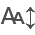

In [17]:
# Enable itables for interactive tables
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)


In [19]:
import duckdb

# 1. Connect (in‐memory)
con = duckdb.connect()

# 2. Group‐by source_domain, count images, captions, pct empty, distinct articles, and avg images/article
source_stats = con.execute("""
    SELECT
      source_domain,
      COUNT(*) AS total_images,
      SUM(CASE WHEN caption IS NOT NULL AND TRIM(caption) <> '' THEN 1 ELSE 0 END) AS with_caption,
      SUM(CASE WHEN caption IS NULL OR TRIM(caption) = '' THEN 1 ELSE 0 END)   AS without_caption,
      100.0 * SUM(CASE WHEN caption IS NULL OR TRIM(caption) = '' THEN 1 ELSE 0 END) 
        / COUNT(*)                                                   AS pct_empty,
      COUNT(DISTINCT article_id)                                      AS num_articles,
      COUNT(*)::DOUBLE / NULLIF(COUNT(DISTINCT article_id), 0)         AS avg_images_per_article
    FROM 'data/blip_captioned_images.parquet'
    GROUP BY source_domain
    ORDER BY pct_empty DESC
""").fetchdf()

# 3. Display the results
show(source_stats)


Loading ITables v2.4.4 from the init_notebook_mode cell... (need help?)


In [22]:
import pandas as pd

# load & parse as before
df = pd.read_parquet("data/filtered_articles.parquet")
df["parsed_date"] = pd.to_datetime(df["date_published"], errors="coerce")

# grab only the failures
bad = df[df["parsed_date"].isna() & df["date_published"].notna()]

# group by source and show up to 5 unique examples each
for src, grp in bad.groupby("source_domain"):
    samples = grp["date_published"].unique()[:5]
    print(f"\n=== {src} ({len(grp)} failures) ===")
    for s in samples:
        print("  ", s)



=== abcnews.go.com (747 failures) ===
   2025-05-31T20:00:04Z
   2025-05-30T17:26:27Z
   2025-05-30T10:29:59Z
   2025-05-30T12:59:35Z
   2025-05-29T01:33:41Z

=== apnews.com (3584 failures) ===
   2024-10-03T21:39:58
   2025-05-19T09:07:26
   2025-05-07T10:07:03
   2025-05-02T22:35:51
   2025-05-17T10:09:43

=== cnbc.com (582 failures) ===
   2023-10-07T16:23:27+0000
   2023-10-08T07:48:54+0000
   2023-10-07T06:57:36+0000
   2023-10-08T18:39:35+0000
   2023-10-08T16:09:31+0000

=== cnn.com (2085 failures) ===
   2025-05-21T06:52:00
   2025-05-28T06:38:00
   2025-05-06T16:14:00
   2025-05-06T18:48:00
   2025-05-09T11:00:00

=== dailymail.co.uk (2990 failures) ===
   00:53, 8 October 2023
   00:51, 8 October 2023
   00:00, 8 October 2023
   22:53, 7 October 2023
   22:22, 7 October 2023

=== express.co.uk (1919 failures) ===
   2023-10-31T22:47:00Z
   2023-10-31T22:01:00Z
   2023-10-31T21:48:00Z
   2023-10-31T19:31:00Z
   2023-10-31T19:04:00Z

=== foxnews.com (2749 failures) ===
    Mar